In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import os

# type in the information in this cell

In [2]:
# Input information in this cell

## Set number
SetNumber = 'set4'

## change directory

os.chdir(r"O:\ImStor\sorger\data\Cytell\Kyun\cycIF_analysis_python_v3_log\set4_4CL_d234_pSmad15pSmad23")
print(os.getcwd())


## cycle number - how many rounds in cycIF?
TotalCycleNumber = 2     #cycIF cycle number

# read csv file as df

df1 = pd.read_csv('SingleCell_set4_BT483_BCD.csv')
df2 = pd.read_csv('SingleCell_set4_MCF7_BCD.csv')
df3 = pd.read_csv('SingleCell_set4_T47D_BCD.csv')
df4 = pd.read_csv('SingleCell_set4_EFM19_BCD.csv')

O:\ImStor\sorger\data\Cytell\Kyun\cycIF_analysis_python_v3_log\set4_4CL_d234_pSmad15pSmad23


In [3]:
# Generate the parameters for Cutoffs - based on the scatter plots below

Ki67negArray = list([])
RBnegArray = list([])
RBhighArray = list([])
DNACutoffArray = list([])

# Color scheme for 6 subpopulations
color = ['magenta', 'lime', 'blue', 'aqua', 'red', 'black']

# BT483 cells

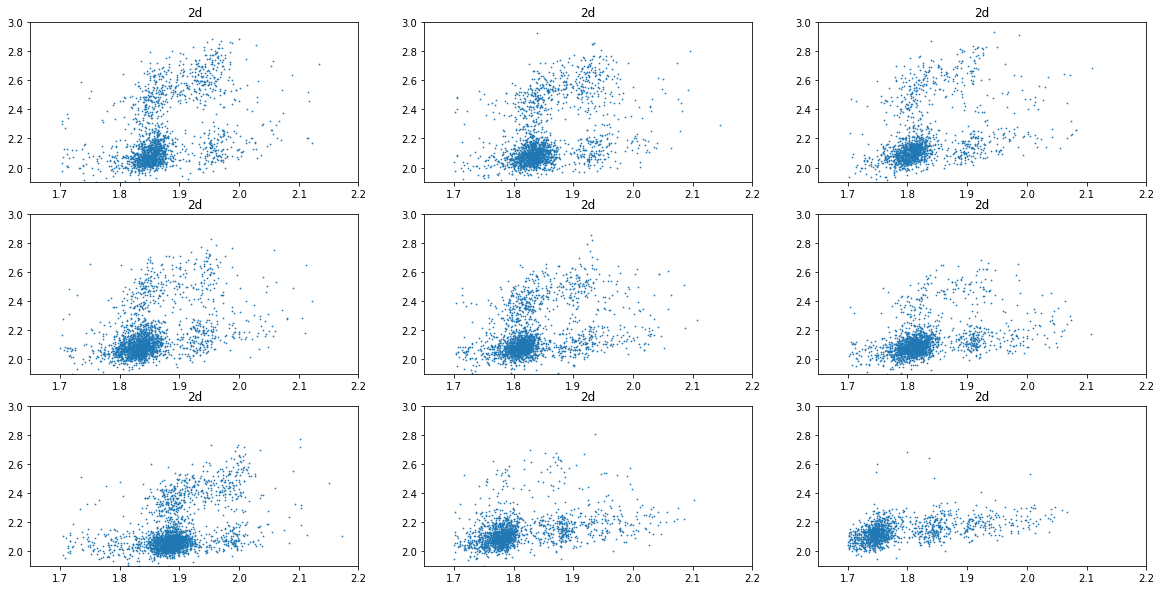

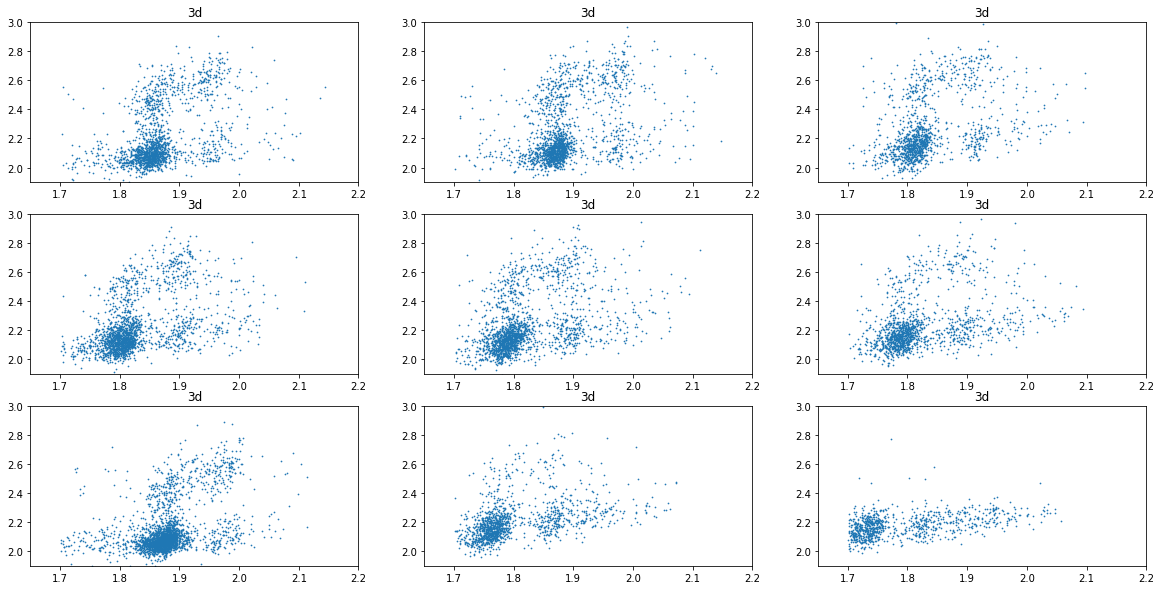

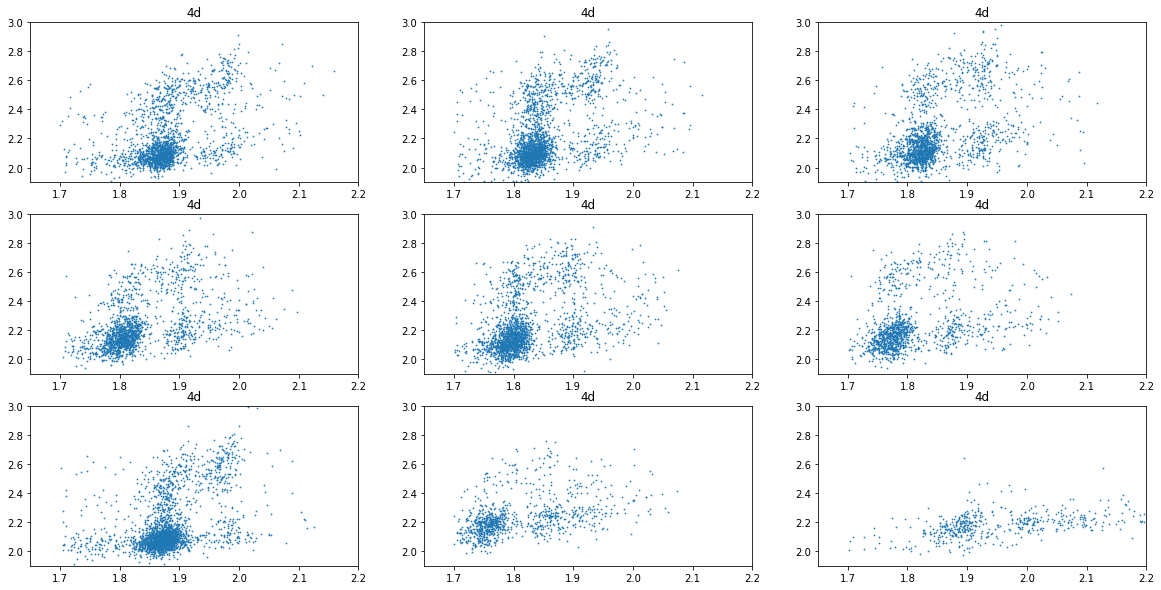

In [4]:
# scatter plot: x_DNAcontent, y_pRB

for k, CellLine in enumerate([df1]):

    for i, time in enumerate(['2d', '3d', '4d']):
        plt.figure(i+1+3*k, figsize=(20,10))

        for num, SelectedDrug in enumerate(['DMSO', 'BYL0.03', 'F+BYL0.03','Fulv', 'BYL0.3','F+BYL0.3','Tram', 'BYL3','F+BYL3']):
            plt.subplot(3, 3, num+1)
            idx = ((CellLine['Treatment']==SelectedDrug) & (CellLine['Time']==time) )

            #if SelectedDrug == 'DMSO':
            ConDNA = np.percentile (np.log10(  CellLine.loc[idx]['Content']  ), 98)

            CellLine.loc[idx, 'Normalized_DNAcontent'] = np.log10( CellLine.loc[idx]['Content'] )/ConDNA*2
 
            idx_live = (CellLine['Normalized_DNAcontent']>1.7)
             
            xx = CellLine.loc[idx & idx_live]['Normalized_DNAcontent']
            yy = np.log10(CellLine.loc[idx & idx_live]['pRB_N'])


            plt.scatter(xx, yy, s=0.5)
            plt.xlim(1.65, 2.2)
            plt.ylim(1.9, 3)
            plt.title(time)

plt.show()

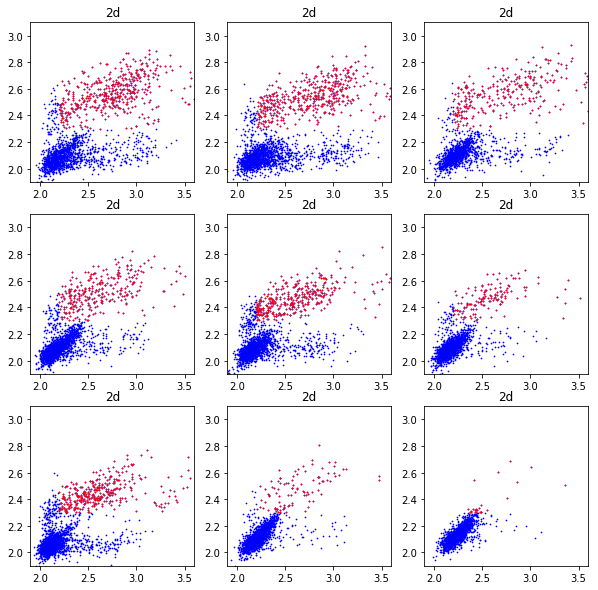

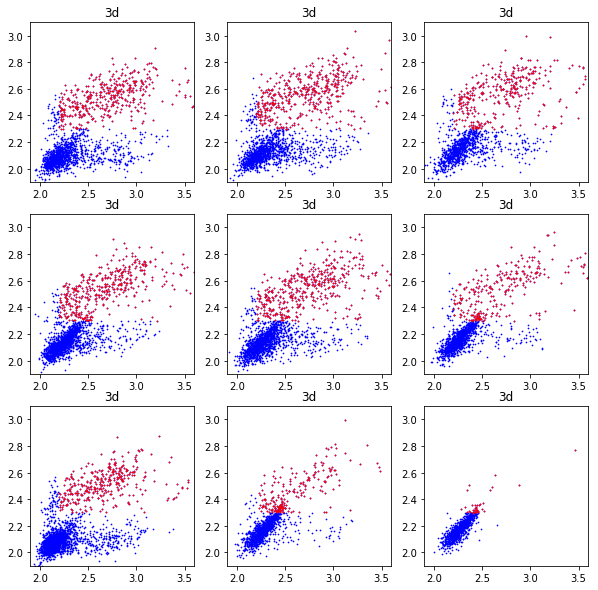

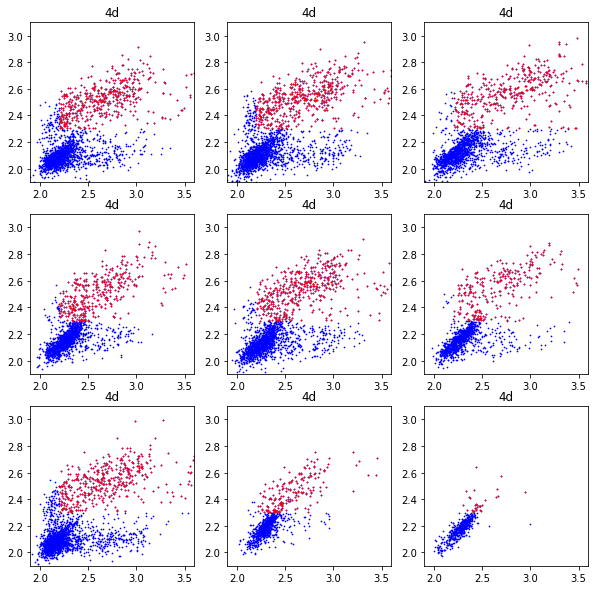

In [6]:
# scatter plot: x_Ki67, y_pRB. You need to input Ki67neg and RBneg, after checking scatter plots

Ki67neg=[2.2];
RBneg=[2.3];

for k, CellLine in enumerate([df1]):

    for i, time in enumerate(['2d', '3d', '4d']):
        plt.figure(i+1+3*k, figsize=(10,10))

        for num, SelectedDrug in enumerate(['DMSO', 'BYL0.03', 'F+BYL0.03','Fulv', 'BYL0.3','F+BYL0.3','Tram', 'BYL3','F+BYL3']):
            plt.subplot(3, 3, num+1)
            idx = ((CellLine['Treatment']==SelectedDrug) & (CellLine['Time']==time) )

            #if SelectedDrug == 'DMSO':
            ConDNA = np.percentile (np.log10(  CellLine.loc[idx]['Content']  ), 98)

            CellLine.loc[idx, 'Normalized_DNAcontent'] = np.log10( CellLine.loc[idx]['Content'] )/ConDNA*2
 
            idx_live = (CellLine['Normalized_DNAcontent']>1.7)
             
            x_all = np.log10(CellLine.loc[idx & idx_live]['Ki67_N'])
            y_all = np.log10(CellLine.loc[idx & idx_live]['pRB_N'])
            
            idx_doublePositive = (np.log10(CellLine['Ki67_N'])>Ki67neg[k]) & (np.log10(CellLine['pRB_N'])>RBneg[k]) 

            x_double = np.log10(CellLine.loc[idx & idx_live & idx_doublePositive]['Ki67_N'])
            y_double = np.log10(CellLine.loc[idx & idx_live & idx_doublePositive]['pRB_N'])
            
            plt.scatter(x_all, y_all, s=0.5, c='b')
            plt.scatter(x_double, y_double, s=0.5, c='r')
            plt.xlim(1.9, 3.6)
            plt.ylim(1.9, 3.1)
            plt.title(time)

plt.show()

In [31]:
# Decide the Cutoffs based on the scatter plot. This part is for BT483 cells

Ki67neg=[2.2];
RBneg=[2.3];

RBhigh=[2.45];

# DNA cutoff for 2N vs 4N. Modify after checking each graph
DNACutoff = 1.9*np.ones([3,9]) + np.array([[0.006, -0.02, -0.05,   #2day
                                            -0.01, -0.03, -0.03,  
                                            0.02, -0.07, -0.095 ], 
                                           [-0.005, -0.003, -0.03,   #3day
                                            -0.05, -0.05, -0.05,  
                                            0.01, -0.1, -0.11], 
                                           [-0.0, -0.015, -0.03,   #4day
                                            -0.045, -0.065, -0.07,  
                                            0.011, -0.09, 0.05,]])


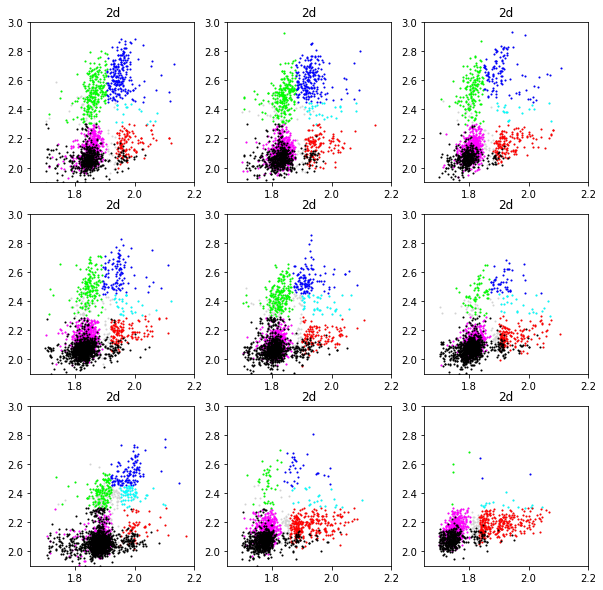

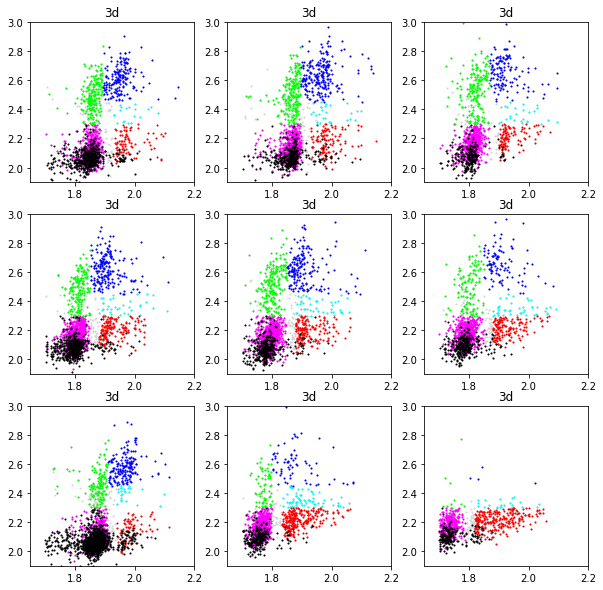

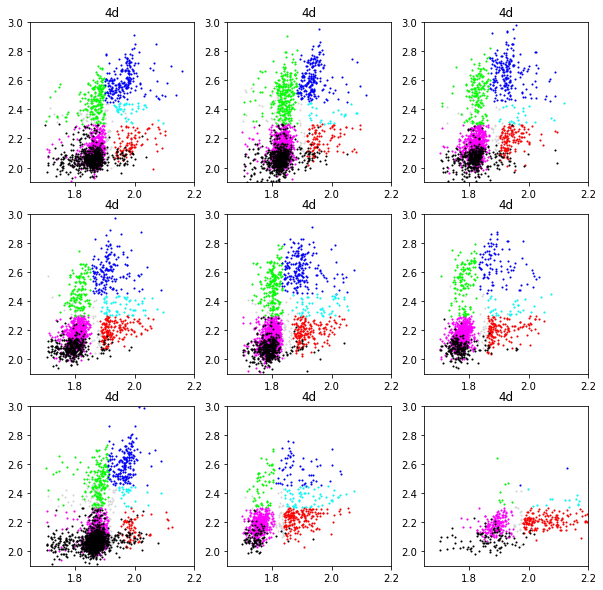

In [32]:
# Scatter plot. x:DNAcontent, y:pRB(log10)
## note: I used DAPI2_N, instead of DAPI1_N for DNA content for this set.
for k, CellLine in enumerate([df1]):
    for i, time in enumerate(['2d', '3d', '4d']):
        f= plt.figure(i+1+3*k, figsize=(10,10))
        for num, SelectedDrug in enumerate(['DMSO', 'BYL0.03', 'F+BYL0.03','Fulv', 'BYL0.3','F+BYL0.3','Tram', 'BYL3','F+BYL3']):
            plt.subplot(3, 3, num+1)
            idx = ((CellLine['Treatment']==SelectedDrug) & (CellLine['Time']==time) )

            #if SelectedDrug == 'DMSO':
            ConDNA = np.percentile (np.log10(  CellLine.loc[idx]['Content']  ), 98)

            CellLine.loc[idx, 'Normalized_DNAcontent'] = np.log10( CellLine.loc[idx]['Content'] )/ConDNA*2
            idx_live = (CellLine['Normalized_DNAcontent']>1.7)
            x_all = CellLine.loc[idx & idx_live]['Normalized_DNAcontent']
            y_all = np.log10(CellLine.loc[idx & idx_live]['pRB_N'])
            
            ## This is to generate index for each population
            idx_Pop1 = ((np.log10(CellLine['Ki67_N'])<=Ki67neg)  & (np.log10(CellLine['pRB_N'])<=RBneg)  )
            idx_Pop2 = ((CellLine['Normalized_DNAcontent']<=DNACutoff[i][num]) &  (np.log10(CellLine['Ki67_N'])>Ki67neg) & (np.log10(CellLine['pRB_N'])<=RBneg) )
            idx_Pop3 = ((CellLine['Normalized_DNAcontent']<=DNACutoff[i][num]) &  (np.log10(CellLine['Ki67_N'])>Ki67neg) & (np.log10(CellLine['pRB_N'])>RBneg)  )
            idx_Pop4 = ((CellLine['Normalized_DNAcontent']>DNACutoff[i][num]) &   (np.log10(CellLine['Ki67_N'])>Ki67neg) & (np.log10(CellLine['pRB_N'])>RBhigh) )
            idx_Pop5 = ((CellLine['Normalized_DNAcontent']>DNACutoff[i][num]+0.03) & (np.log10(CellLine['Ki67_N'])>Ki67neg) & (np.log10(CellLine['pRB_N'])>RBneg) & (np.log10(CellLine['pRB_N'])<=RBhigh) )
            idx_Pop6 = ((CellLine['Normalized_DNAcontent']>DNACutoff[i][num]+0.03) & (np.log10(CellLine['Ki67_N'])>Ki67neg) & (np.log10(CellLine['pRB_N'])<=RBneg) )
            plt.scatter(x_all, y_all, s=1, c='lightgrey')
            for j, chosenPop in enumerate([idx_Pop2, idx_Pop3, idx_Pop4, idx_Pop5, idx_Pop6, idx_Pop1]):
                X_pop = CellLine.loc[idx & idx_live & chosenPop]['Normalized_DNAcontent']
                Y_pop = np.log10(CellLine.loc[idx & idx_live & chosenPop]['pRB_N'])
                plt.scatter(X_pop, Y_pop, s=1, c=color[j])
            plt.xlim(1.65, 2.2)
            plt.ylim(1.9, 3)
            plt.title(time)
plt.show()

In [33]:
# Save parameters, BT483

Ki67negArray = Ki67negArray + list(Ki67neg)
RBnegArray = RBnegArray + list(RBneg)
RBhighArray = RBhighArray + list(RBhigh)
DNACutoffArray = DNACutoffArray + [list(DNACutoff)]

# MCF7 cells

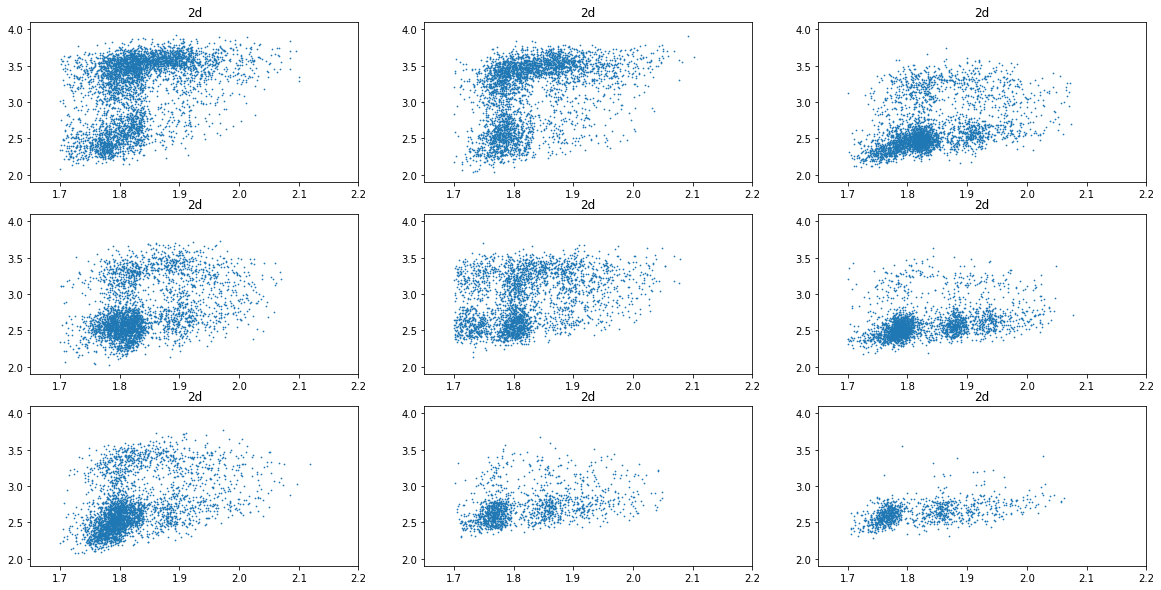

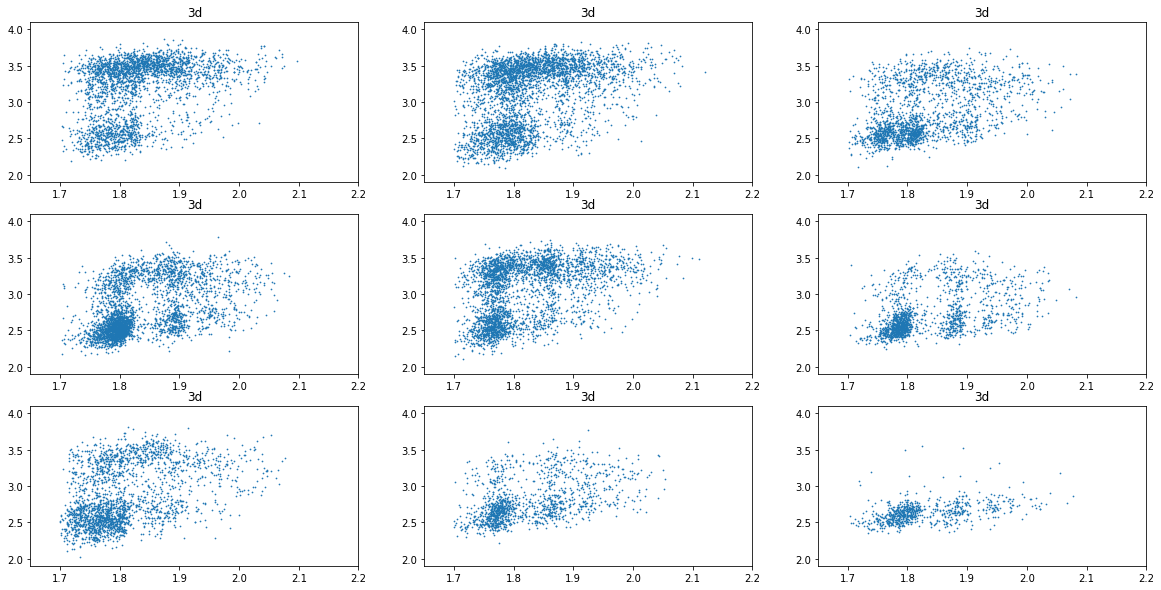

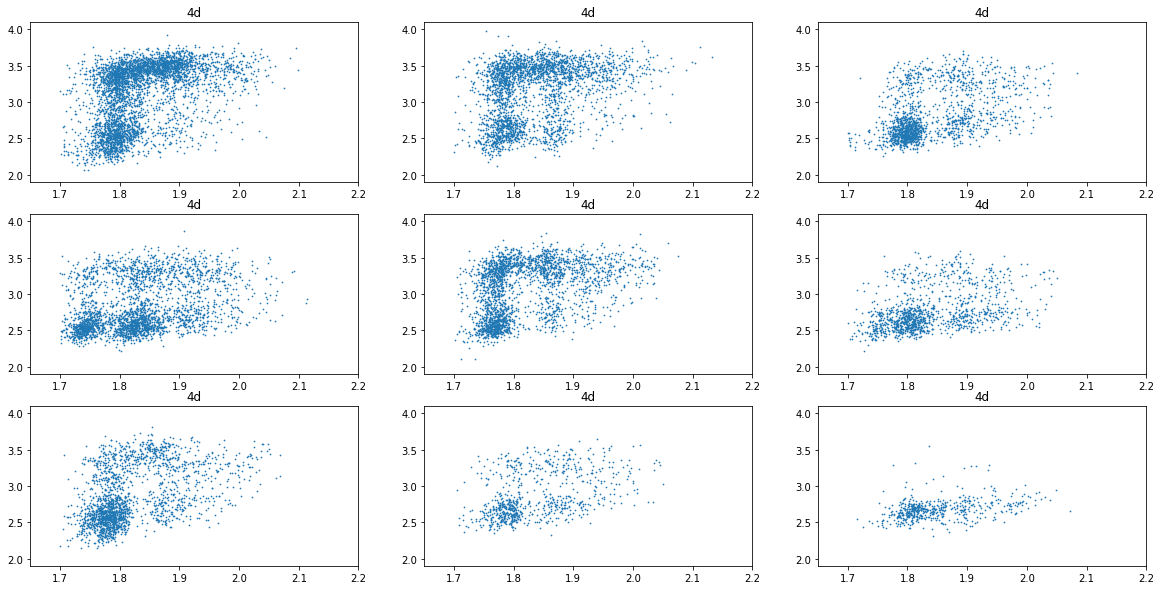

In [34]:
# scatter plot: x_DNAcontent, y_pRB

for k, CellLine in enumerate([df2]):

    for i, time in enumerate(['2d', '3d', '4d']):
        plt.figure(i+1+3*k, figsize=(20,10))

        for num, SelectedDrug in enumerate(['DMSO', 'BYL0.03', 'F+BYL0.03','Fulv', 'BYL0.3','F+BYL0.3','Tram', 'BYL3','F+BYL3']):
            plt.subplot(3, 3, num+1)
            idx = ((CellLine['Treatment']==SelectedDrug) & (CellLine['Time']==time) )

            #if SelectedDrug == 'DMSO':
            ConDNA = np.percentile (np.log10(  CellLine.loc[idx]['Content'] ), 98)

            CellLine.loc[idx, 'Normalized_DNAcontent'] = np.log10( CellLine.loc[idx]['Content'])/ConDNA*2
 
            idx_live = (CellLine['Normalized_DNAcontent']>1.7)
             
            xx = CellLine.loc[idx & idx_live]['Normalized_DNAcontent']
            yy = np.log10(CellLine.loc[idx & idx_live]['pRB_N'])


            plt.scatter(xx, yy, s=0.5)
            plt.xlim(1.65, 2.2)
            plt.ylim(1.9, 4.1)
            plt.title(time)

plt.show()

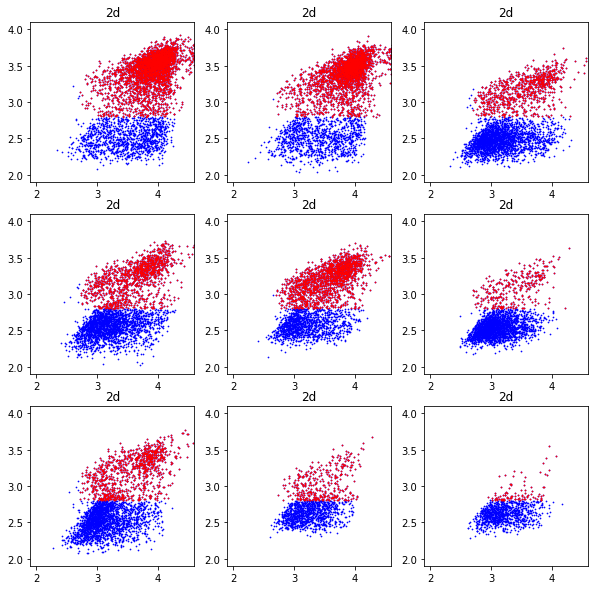

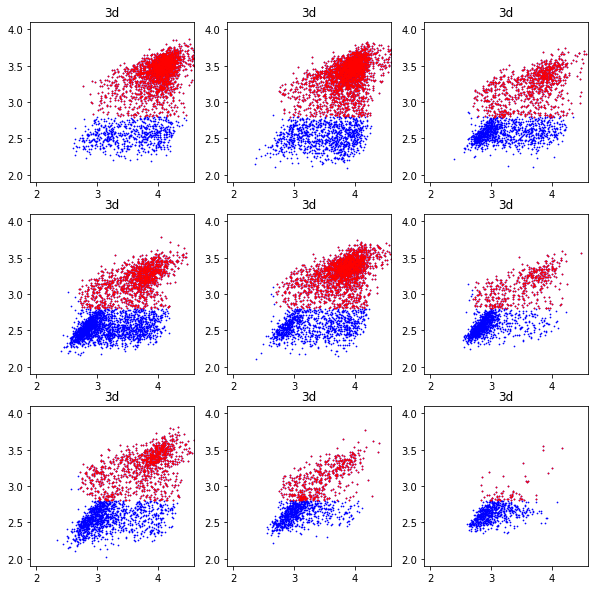

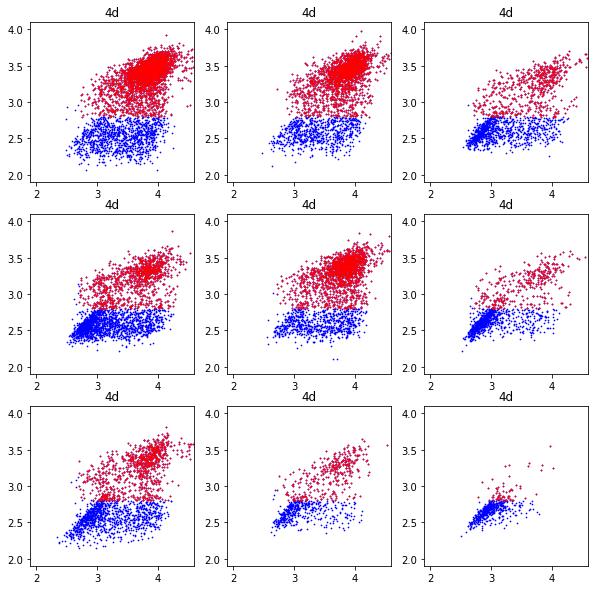

In [36]:
# scatter plot: x_Ki67, y_pRB. You need to input Ki67neg and RBneg, after checking scatter plots


Ki67neg=[2.7];
RBneg=[2.8];

for k, CellLine in enumerate([df2]):

    for i, time in enumerate(['2d', '3d', '4d']):
        plt.figure(i+1+3*k, figsize=(10,10))

        for num, SelectedDrug in enumerate(['DMSO', 'BYL0.03', 'F+BYL0.03','Fulv', 'BYL0.3','F+BYL0.3','Tram', 'BYL3','F+BYL3']):
            plt.subplot(3, 3, num+1)
            idx = ((CellLine['Treatment']==SelectedDrug) & (CellLine['Time']==time) )

            #if SelectedDrug == 'DMSO':
            ConDNA = np.percentile (np.log10(  CellLine.loc[idx]['Content']  ), 98)

            CellLine.loc[idx, 'Normalized_DNAcontent'] = np.log10( CellLine.loc[idx]['Content'] )/ConDNA*2
 
            idx_live = (CellLine['Normalized_DNAcontent']>1.7)
             
            x_all = np.log10(CellLine.loc[idx & idx_live]['Ki67_N'])
            y_all = np.log10(CellLine.loc[idx & idx_live]['pRB_N'])
            
            idx_doublePositive = (np.log10(CellLine['Ki67_N'])>Ki67neg[k]) & (np.log10(CellLine['pRB_N'])>RBneg[k]) 

            x_double = np.log10(CellLine.loc[idx & idx_live & idx_doublePositive]['Ki67_N'])
            y_double = np.log10(CellLine.loc[idx & idx_live & idx_doublePositive]['pRB_N'])
            
            plt.scatter(x_all, y_all, s=0.5, c='b')
            plt.scatter(x_double, y_double, s=0.5, c='r')
            plt.xlim(1.9, 4.6)
            plt.ylim(1.9, 4.1)
            plt.title(time)

plt.show()

In [41]:
# Decide the Cutoffs based on the scatter plot. This part is for BT483 cells
Ki67neg=[2.7];
RBneg=[2.8];

RBhigh=[3.15];

# DNA cutoff for 2N vs 4N. Modify after checking each graph
DNACutoff = 1.9*np.ones([3,9]) + np.array([[-0.08, -0.08, -0.07,   #2day
                                            -0.06, -0.075, -0.06,  
                                            -0.05, -0.08, -0.09 ], 
                                           [-0.06, -0.06, -0.08,   #2day
                                            -0.065, -0.09, -0.07,  
                                            -0.085, -0.085, -0.07 ], 
                                           [-0.07, -0.075, -0.06,   #2day
                                            -0.05, -0.08, -0.06,  
                                            -0.06, -0.075, -0.04 ]
                                          ])

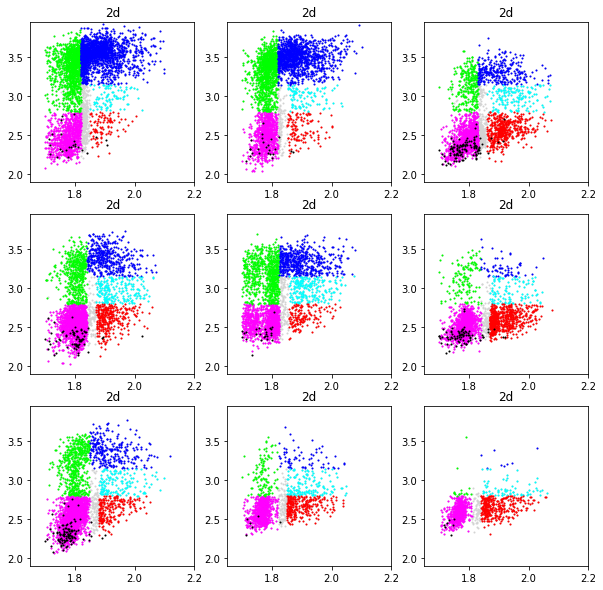

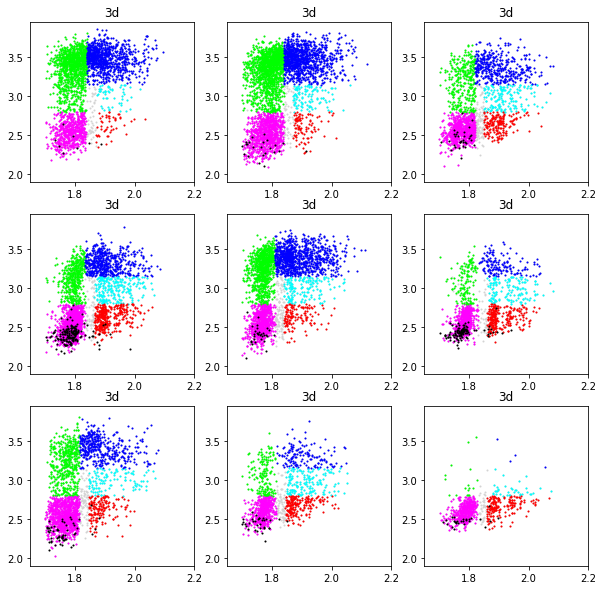

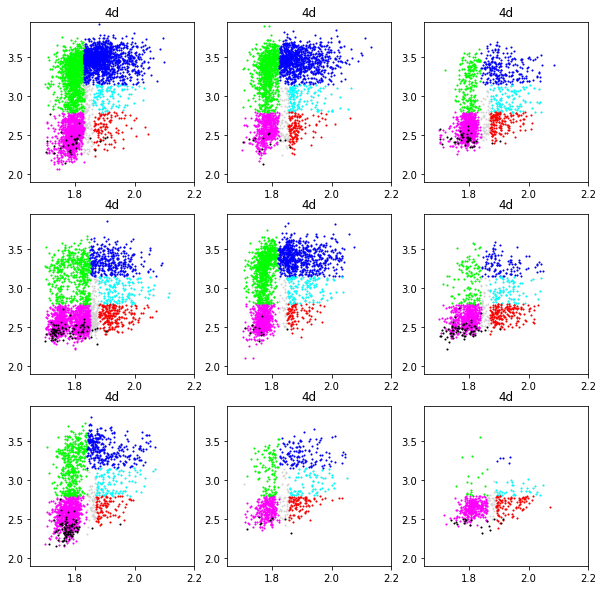

In [42]:
# Scatter plot. x:DNAcontent, y:pRB(log10)

for k, CellLine in enumerate([df2]):
    for i, time in enumerate(['2d', '3d', '4d']):
        f= plt.figure(i+1+3*k, figsize=(10,10))
        for num, SelectedDrug in enumerate(['DMSO', 'BYL0.03', 'F+BYL0.03','Fulv', 'BYL0.3','F+BYL0.3','Tram', 'BYL3','F+BYL3']):
            plt.subplot(3, 3, num+1)
            idx = ((CellLine['Treatment']==SelectedDrug) & (CellLine['Time']==time) )

            #if SelectedDrug == 'DMSO':
            ConDNA = np.percentile (np.log10(  CellLine.loc[idx]['Content']  ), 98)

            CellLine.loc[idx, 'Normalized_DNAcontent'] = np.log10( CellLine.loc[idx]['Content'] )/ConDNA*2
            idx_live = (CellLine['Normalized_DNAcontent']>1.7)
            x_all = CellLine.loc[idx & idx_live]['Normalized_DNAcontent']
            y_all = np.log10(CellLine.loc[idx & idx_live]['pRB_N'])
            
            ## This is to generate index for each population
            idx_Pop1 = ((np.log10(CellLine['Ki67_N'])<=Ki67neg)  & (np.log10(CellLine['pRB_N'])<=RBneg)  )
            idx_Pop2 = ((CellLine['Normalized_DNAcontent']<=DNACutoff[i][num]) &  (np.log10(CellLine['Ki67_N'])>Ki67neg) & (np.log10(CellLine['pRB_N'])<=RBneg) )
            idx_Pop3 = ((CellLine['Normalized_DNAcontent']<=DNACutoff[i][num]) &  (np.log10(CellLine['Ki67_N'])>Ki67neg) & (np.log10(CellLine['pRB_N'])>RBneg)  )
            idx_Pop4 = ((CellLine['Normalized_DNAcontent']>DNACutoff[i][num]) &   (np.log10(CellLine['Ki67_N'])>Ki67neg) & (np.log10(CellLine['pRB_N'])>RBhigh) )
            idx_Pop5 = ((CellLine['Normalized_DNAcontent']>DNACutoff[i][num]+0.03) & (np.log10(CellLine['Ki67_N'])>Ki67neg) & (np.log10(CellLine['pRB_N'])>RBneg) & (np.log10(CellLine['pRB_N'])<=RBhigh) )
            idx_Pop6 = ((CellLine['Normalized_DNAcontent']>DNACutoff[i][num]+0.03) & (np.log10(CellLine['Ki67_N'])>Ki67neg) & (np.log10(CellLine['pRB_N'])<=RBneg) )
            plt.scatter(x_all, y_all, s=1, c='lightgrey')
            for j, chosenPop in enumerate([idx_Pop2, idx_Pop3, idx_Pop4, idx_Pop5, idx_Pop6, idx_Pop1]):
                X_pop = CellLine.loc[idx & idx_live & chosenPop]['Normalized_DNAcontent']
                Y_pop = np.log10(CellLine.loc[idx & idx_live & chosenPop]['pRB_N'])
                plt.scatter(X_pop, Y_pop, s=1, c=color[j])
            plt.xlim(1.65, 2.2)
            plt.ylim(1.9, 3.95)
            plt.title(time)
plt.show()

In [43]:
# Save parameters, BT483, MCF7

Ki67negArray = Ki67negArray + list(Ki67neg)
RBnegArray = RBnegArray + list(RBneg)
RBhighArray = RBhighArray + list(RBhigh)
DNACutoffArray = DNACutoffArray + [list(DNACutoff)]

# T47D cells

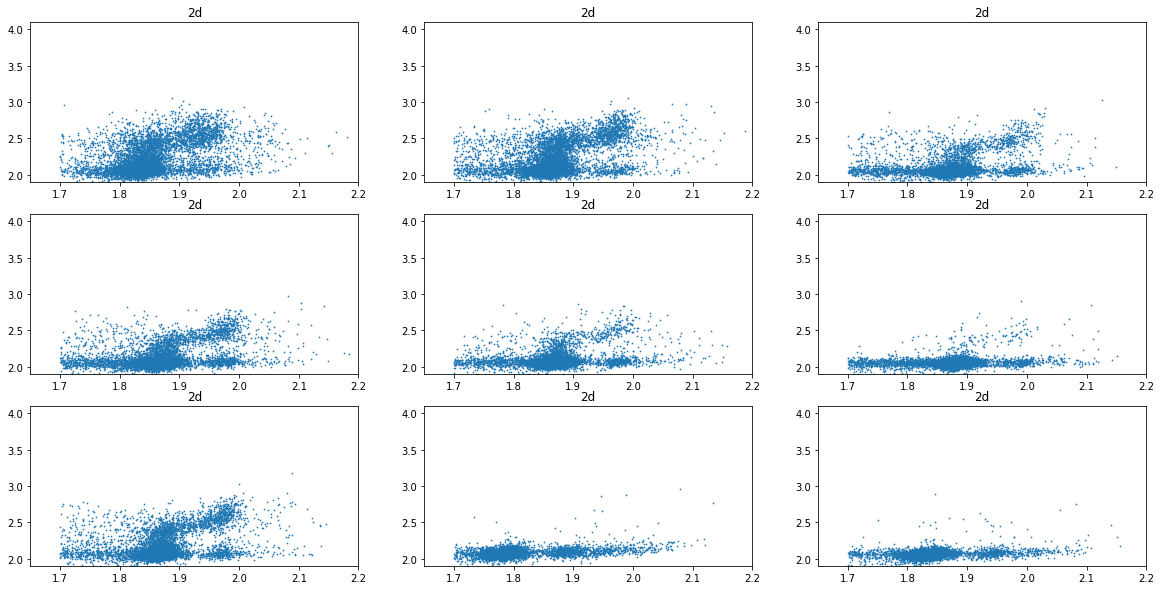

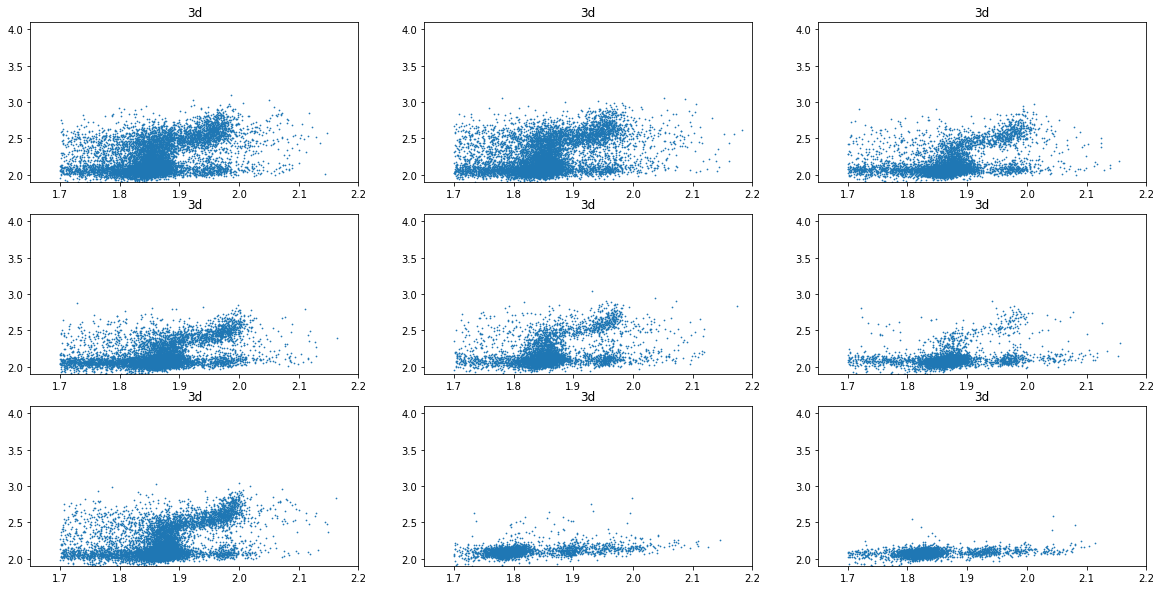

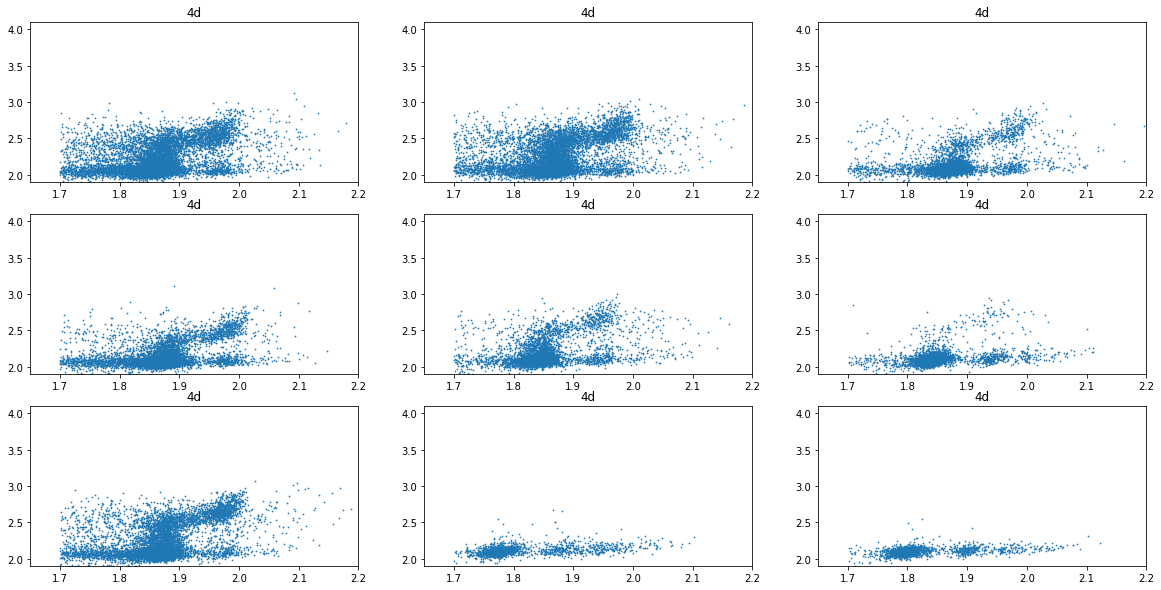

In [44]:
# scatter plot: x_DNAcontent, y_pRB

for k, CellLine in enumerate([df3]):

    for i, time in enumerate(['2d', '3d', '4d']):
        plt.figure(i+1+3*k, figsize=(20,10))

        for num, SelectedDrug in enumerate(['DMSO', 'BYL0.03', 'F+BYL0.03','Fulv', 'BYL0.3','F+BYL0.3','Tram', 'BYL3','F+BYL3']):
            plt.subplot(3, 3, num+1)
            idx = ((CellLine['Treatment']==SelectedDrug) & (CellLine['Time']==time) )

            #if SelectedDrug == 'DMSO':
            ConDNA = np.percentile (np.log10(  CellLine.loc[idx]['Content'] ), 98)

            CellLine.loc[idx, 'Normalized_DNAcontent'] = np.log10( CellLine.loc[idx]['Content'])/ConDNA*2
 
            idx_live = (CellLine['Normalized_DNAcontent']>1.7)
             
            xx = CellLine.loc[idx & idx_live]['Normalized_DNAcontent']
            yy = np.log10(CellLine.loc[idx & idx_live]['pRB_N'])


            plt.scatter(xx, yy, s=0.5)
            plt.xlim(1.65, 2.2)
            plt.ylim(1.9, 4.1)
            plt.title(time)

plt.show()

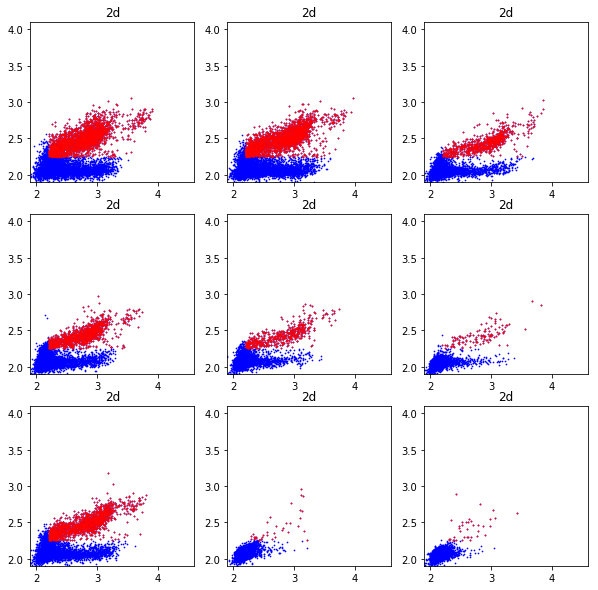

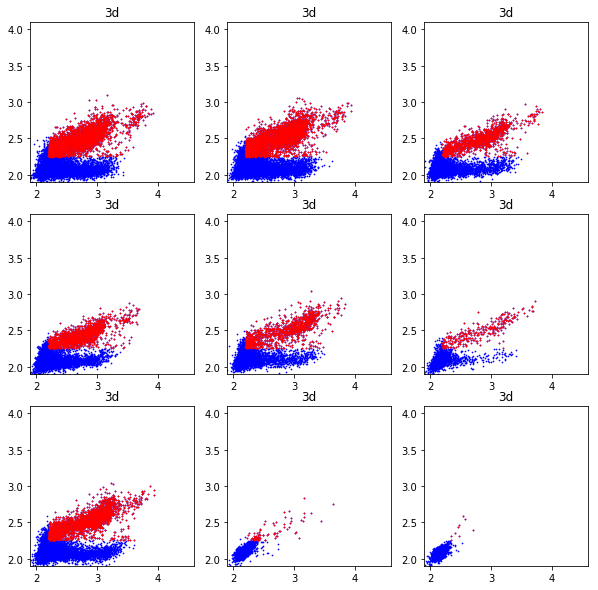

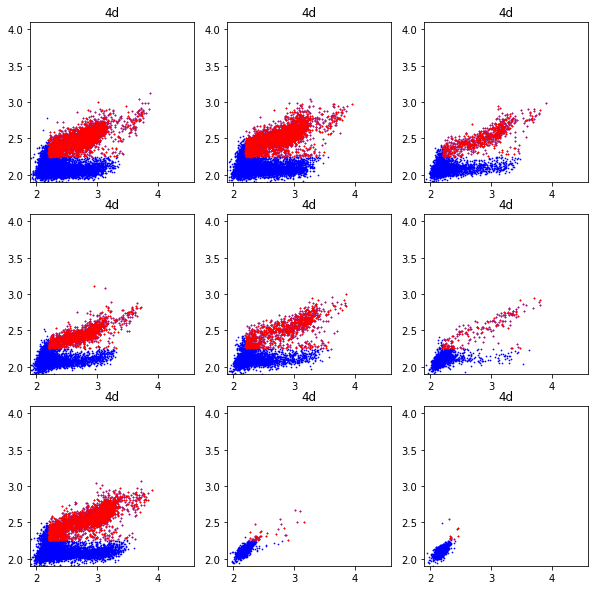

In [45]:
# scatter plot: x_Ki67, y_pRB. You need to input Ki67neg and RBneg, after checking scatter plots

Ki67neg=[2.2];
RBneg=[2.25];

for k, CellLine in enumerate([df3]):

    for i, time in enumerate(['2d', '3d', '4d']):
        plt.figure(i+1+3*k, figsize=(10,10))

        for num, SelectedDrug in enumerate(['DMSO', 'BYL0.03', 'F+BYL0.03','Fulv', 'BYL0.3','F+BYL0.3','Tram', 'BYL3','F+BYL3']):
            plt.subplot(3, 3, num+1)
            idx = ((CellLine['Treatment']==SelectedDrug) & (CellLine['Time']==time) )

            #if SelectedDrug == 'DMSO':
            ConDNA = np.percentile (np.log10(  CellLine.loc[idx]['Content']  ), 98)

            CellLine.loc[idx, 'Normalized_DNAcontent'] = np.log10( CellLine.loc[idx]['Content'] )/ConDNA*2
 
            idx_live = (CellLine['Normalized_DNAcontent']>1.7)
             
            x_all = np.log10(CellLine.loc[idx & idx_live]['Ki67_N'])
            y_all = np.log10(CellLine.loc[idx & idx_live]['pRB_N'])
            
            idx_doublePositive = (np.log10(CellLine['Ki67_N'])>Ki67neg[k]) & (np.log10(CellLine['pRB_N'])>RBneg[k]) 

            x_double = np.log10(CellLine.loc[idx & idx_live & idx_doublePositive]['Ki67_N'])
            y_double = np.log10(CellLine.loc[idx & idx_live & idx_doublePositive]['pRB_N'])
            
            plt.scatter(x_all, y_all, s=0.5, c='b')
            plt.scatter(x_double, y_double, s=0.5, c='r')
            plt.xlim(1.9, 4.6)
            plt.ylim(1.9, 4.1)
            plt.title(time)

plt.show()

In [46]:
# Decide the Cutoffs based on the scatter plot. This part is for BT483 cells
Ki67neg=[2.2];
RBneg=[2.25];

RBhigh=[2.5];

# DNA cutoff for 2N vs 4N. Modify after checking each graph
DNACutoff = 2*np.ones([3,9]) + np.array([[-0.11, -0.09, -0.09,   #2day
                                            -0.07, -0.1, -0.07,  
                                            -0.1, -0.17, -0.14 ], 
                                           [-0.08, -0.09, -0.09,   #2day
                                            -0.06, -0.11, -0.11,  
                                            -0.07, -0.17, -0.14 ], 
                                           [-0.07, -0.08, -0.11,   #2day
                                            -0.09, -0.12, -0.12,  
                                            -0.1, -0.17, -0.14 ]
                                          ])

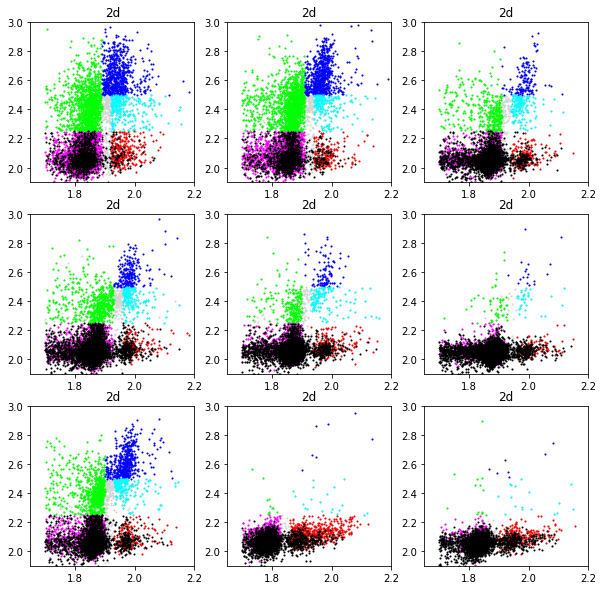

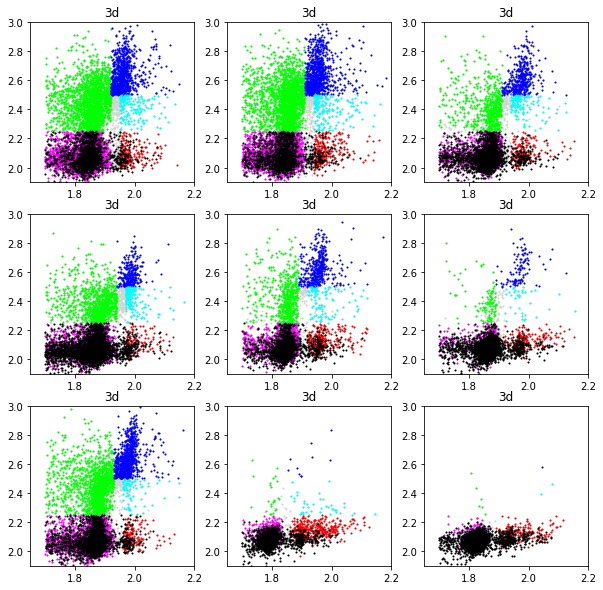

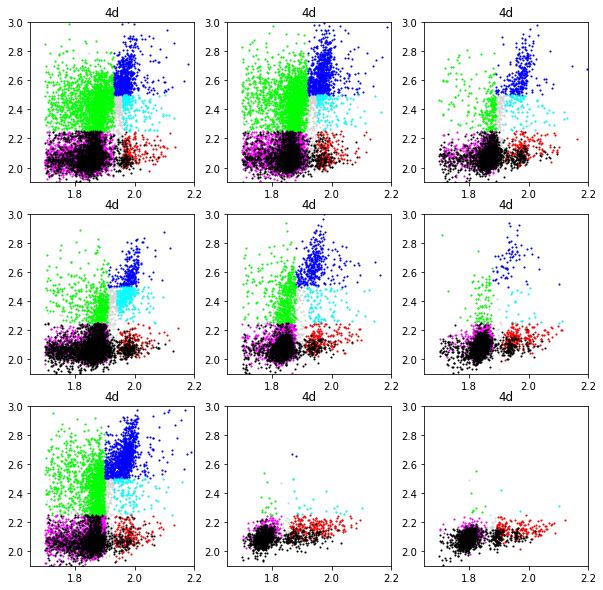

In [47]:
# Scatter plot. x:DNAcontent, y:pRB(log10)

for k, CellLine in enumerate([df3]):
    for i, time in enumerate(['2d', '3d', '4d']):
        f= plt.figure(i+1+3*k, figsize=(10,10))
        for num, SelectedDrug in enumerate(['DMSO', 'BYL0.03', 'F+BYL0.03','Fulv', 'BYL0.3','F+BYL0.3','Tram', 'BYL3','F+BYL3']):
            plt.subplot(3, 3, num+1)
            idx = ((CellLine['Treatment']==SelectedDrug) & (CellLine['Time']==time) )

            #if SelectedDrug == 'DMSO':
            ConDNA = np.percentile (np.log10(  CellLine.loc[idx]['Content']  ), 98)

            CellLine.loc[idx, 'Normalized_DNAcontent'] = np.log10( CellLine.loc[idx]['Content'] )/ConDNA*2
            idx_live = (CellLine['Normalized_DNAcontent']>1.7)
            x_all = CellLine.loc[idx & idx_live]['Normalized_DNAcontent']
            y_all = np.log10(CellLine.loc[idx & idx_live]['pRB_N'])
            
            ## This is to generate index for each population
            idx_Pop1 = ((np.log10(CellLine['Ki67_N'])<=Ki67neg)  & (np.log10(CellLine['pRB_N'])<=RBneg)  )
            idx_Pop2 = ((CellLine['Normalized_DNAcontent']<=DNACutoff[i][num]) &  (np.log10(CellLine['Ki67_N'])>Ki67neg) & (np.log10(CellLine['pRB_N'])<=RBneg) )
            idx_Pop3 = ((CellLine['Normalized_DNAcontent']<=DNACutoff[i][num]) &  (np.log10(CellLine['Ki67_N'])>Ki67neg) & (np.log10(CellLine['pRB_N'])>RBneg)  )
            idx_Pop4 = ((CellLine['Normalized_DNAcontent']>DNACutoff[i][num]) &   (np.log10(CellLine['Ki67_N'])>Ki67neg) & (np.log10(CellLine['pRB_N'])>RBhigh) )
            idx_Pop5 = ((CellLine['Normalized_DNAcontent']>DNACutoff[i][num]+0.03) & (np.log10(CellLine['Ki67_N'])>Ki67neg) & (np.log10(CellLine['pRB_N'])>RBneg) & (np.log10(CellLine['pRB_N'])<=RBhigh) )
            idx_Pop6 = ((CellLine['Normalized_DNAcontent']>DNACutoff[i][num]+0.03) & (np.log10(CellLine['Ki67_N'])>Ki67neg) & (np.log10(CellLine['pRB_N'])<=RBneg) )
            plt.scatter(x_all, y_all, s=1, c='lightgrey')
            for j, chosenPop in enumerate([idx_Pop2, idx_Pop3, idx_Pop4, idx_Pop5, idx_Pop6, idx_Pop1]):
                X_pop = CellLine.loc[idx & idx_live & chosenPop]['Normalized_DNAcontent']
                Y_pop = np.log10(CellLine.loc[idx & idx_live & chosenPop]['pRB_N'])
                plt.scatter(X_pop, Y_pop, s=1, c=color[j])
            plt.xlim(1.65, 2.2)
            plt.ylim(1.9, 3)
            plt.title(time)
plt.show()

In [48]:
# Save parameters, BT483, MCF7, T47D

Ki67negArray = Ki67negArray + list(Ki67neg)
RBnegArray = RBnegArray + list(RBneg)
RBhighArray = RBhighArray + list(RBhigh)
DNACutoffArray = DNACutoffArray + [list(DNACutoff)]

# EFM19 cells

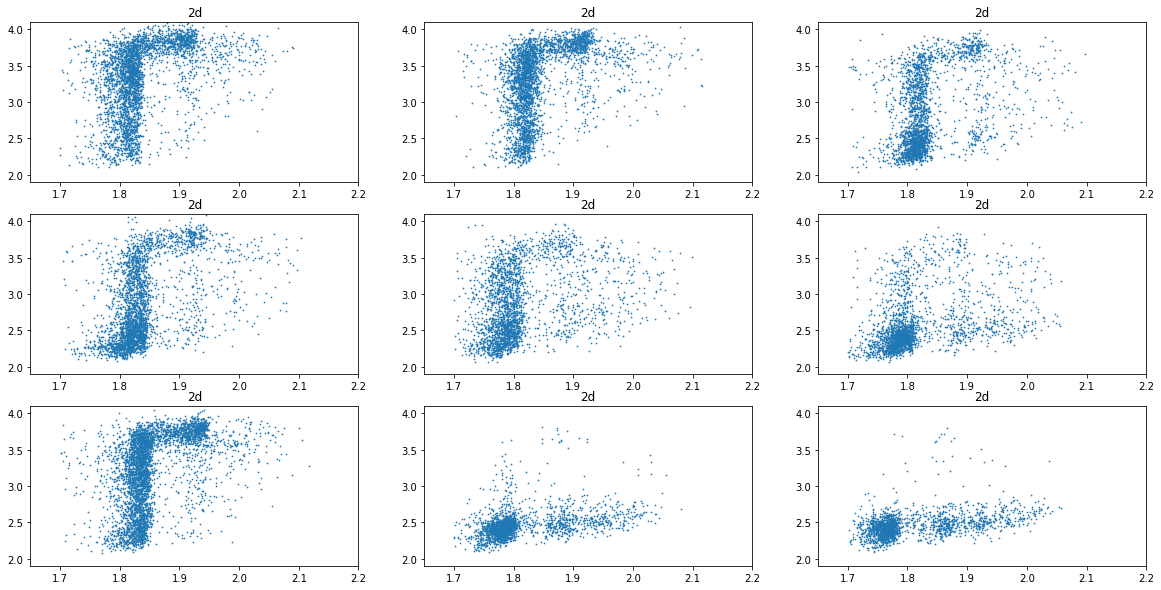

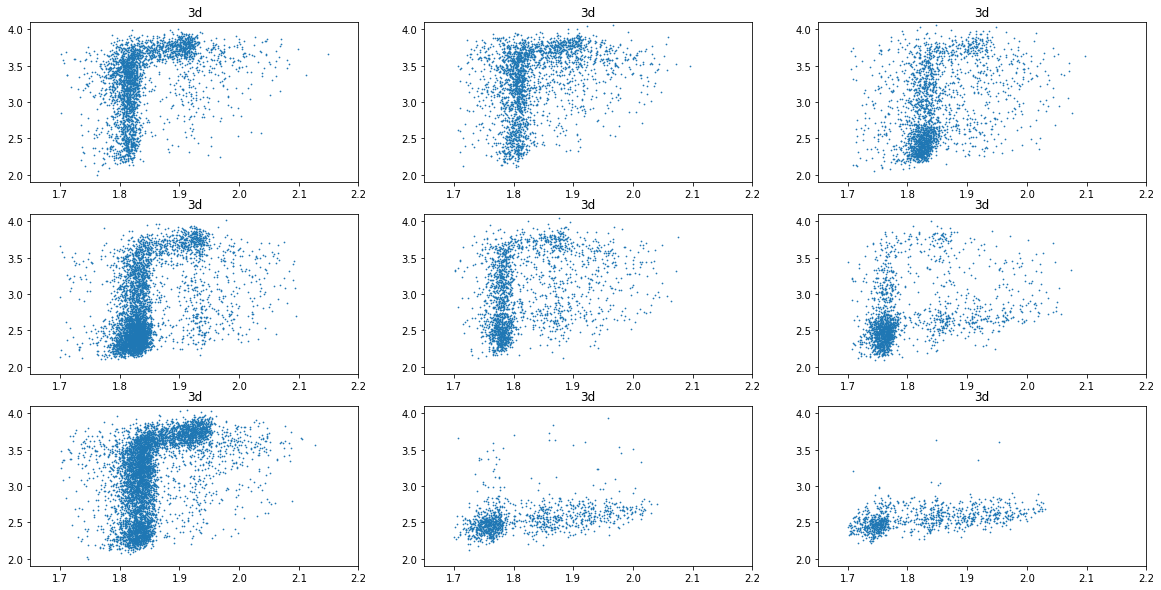

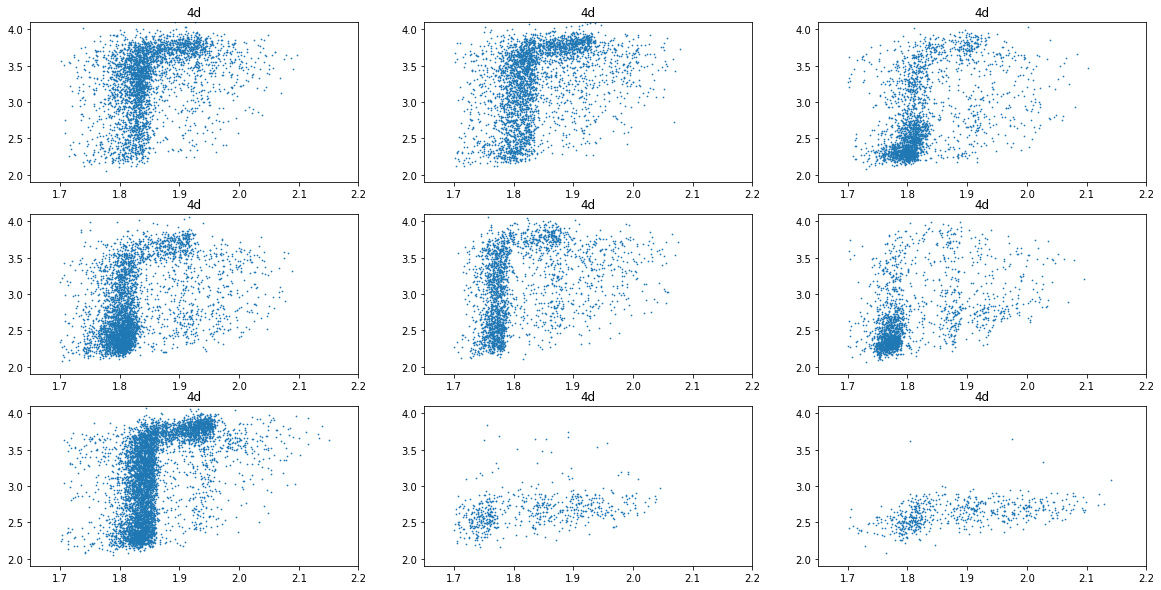

In [49]:
# scatter plot: x_DNAcontent, y_pRB

for k, CellLine in enumerate([df4]):

    for i, time in enumerate(['2d', '3d', '4d']):
        plt.figure(i+1+3*k, figsize=(20,10))

        for num, SelectedDrug in enumerate(['DMSO', 'BYL0.03', 'F+BYL0.03','Fulv', 'BYL0.3','F+BYL0.3','Tram', 'BYL3','F+BYL3']):
            plt.subplot(3, 3, num+1)
            idx = ((CellLine['Treatment']==SelectedDrug) & (CellLine['Time']==time) )

            #if SelectedDrug == 'DMSO':
            ConDNA = np.percentile (np.log10(  CellLine.loc[idx]['Content'] ), 98)

            CellLine.loc[idx, 'Normalized_DNAcontent'] = np.log10( CellLine.loc[idx]['Content'])/ConDNA*2
 
            idx_live = (CellLine['Normalized_DNAcontent']>1.7)
             
            xx = CellLine.loc[idx & idx_live]['Normalized_DNAcontent']
            yy = np.log10(CellLine.loc[idx & idx_live]['pRB_N'])


            plt.scatter(xx, yy, s=0.5)
            plt.xlim(1.65, 2.2)
            plt.ylim(1.9, 4.1)
            plt.title(time)

plt.show()

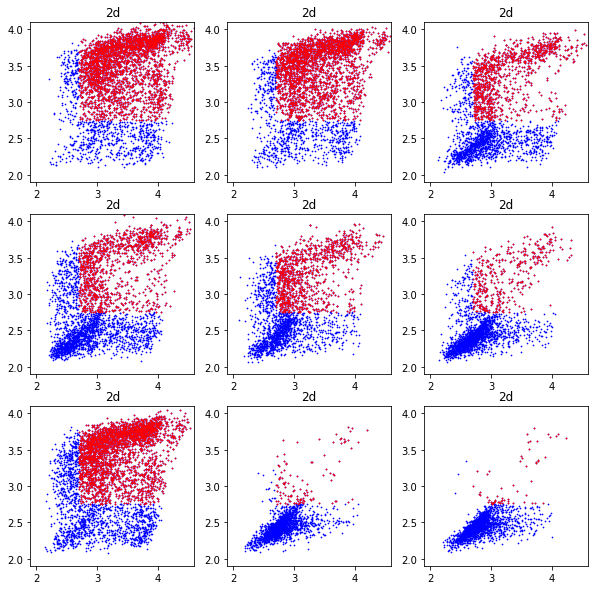

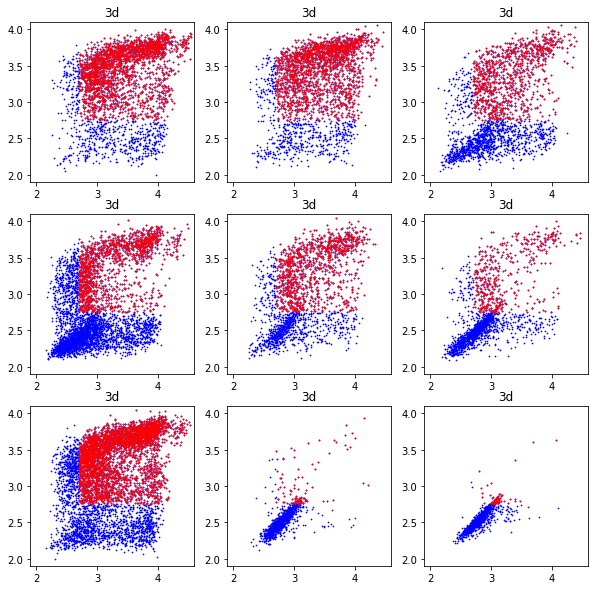

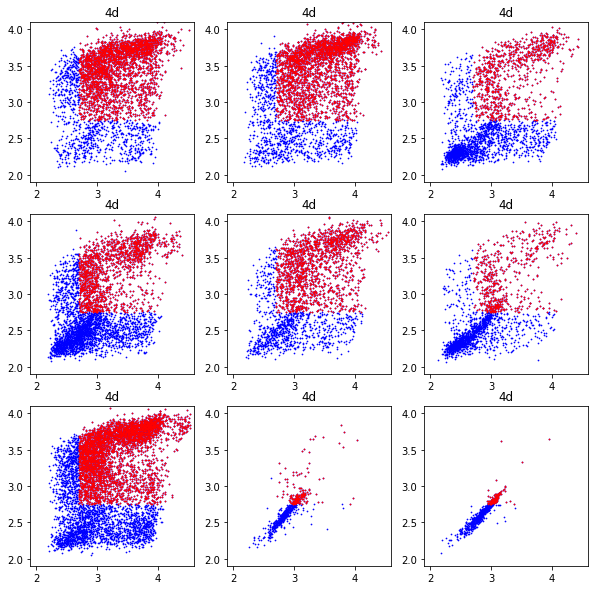

In [50]:
# scatter plot: x_Ki67, y_pRB. You need to input Ki67neg and RBneg, after checking scatter plots

Ki67neg=[2.7];
RBneg=[2.75];

for k, CellLine in enumerate([df4]):

    for i, time in enumerate(['2d', '3d', '4d']):
        plt.figure(i+1+3*k, figsize=(10,10))

        for num, SelectedDrug in enumerate(['DMSO', 'BYL0.03', 'F+BYL0.03','Fulv', 'BYL0.3','F+BYL0.3','Tram', 'BYL3','F+BYL3']):
            plt.subplot(3, 3, num+1)
            idx = ((CellLine['Treatment']==SelectedDrug) & (CellLine['Time']==time) )

            #if SelectedDrug == 'DMSO':
            ConDNA = np.percentile (np.log10(  CellLine.loc[idx]['Content']  ), 98)

            CellLine.loc[idx, 'Normalized_DNAcontent'] = np.log10( CellLine.loc[idx]['Content'] )/ConDNA*2
 
            idx_live = (CellLine['Normalized_DNAcontent']>1.7)
             
            x_all = np.log10(CellLine.loc[idx & idx_live]['Ki67_N'])
            y_all = np.log10(CellLine.loc[idx & idx_live]['pRB_N'])
            
            idx_doublePositive = (np.log10(CellLine['Ki67_N'])>Ki67neg[k]) & (np.log10(CellLine['pRB_N'])>RBneg[k]) 

            x_double = np.log10(CellLine.loc[idx & idx_live & idx_doublePositive]['Ki67_N'])
            y_double = np.log10(CellLine.loc[idx & idx_live & idx_doublePositive]['pRB_N'])
            
            plt.scatter(x_all, y_all, s=0.5, c='b')
            plt.scatter(x_double, y_double, s=0.5, c='r')
            plt.xlim(1.9, 4.6)
            plt.ylim(1.9, 4.1)
            plt.title(time)

plt.show()

In [63]:
# Decide the Cutoffs based on the scatter plot. This part is for BT483 cells
Ki67neg=[2.7];
RBneg=[2.75];

RBhigh=[3.3];

# DNA cutoff for 2N vs 4N. Modify after checking each graph
DNACutoff = 2*np.ones([3,9]) + np.array([[-0.13, -0.14, -0.14,   #2day
                                            -0.12, -0.15, -0.16,  
                                            -0.14, -0.19, -0.21 ], 
                                           [-0.13, -0.16, -0.15,   #2day
                                            -0.12, -0.18, -0.2,  
                                            -0.14, -0.21, -0.19 ], 
                                           [-0.13, -0.14, -0.16,   #2day
                                            -0.12, -0.18, -0.18,  
                                            -0.14, -0.20, -0.14 ]
                                          ])

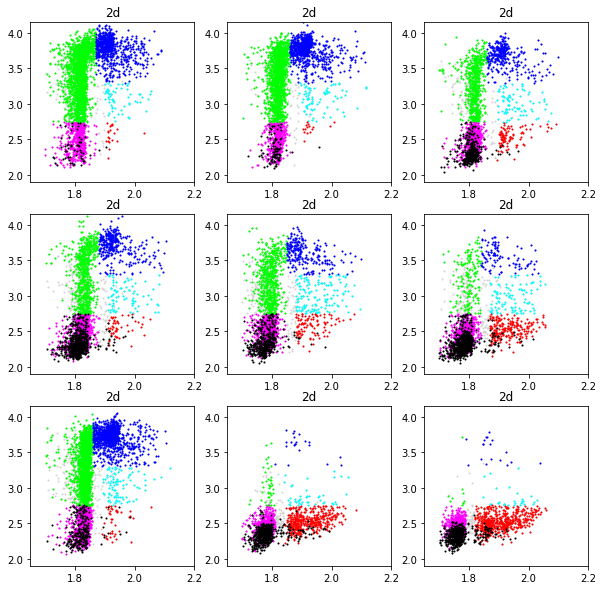

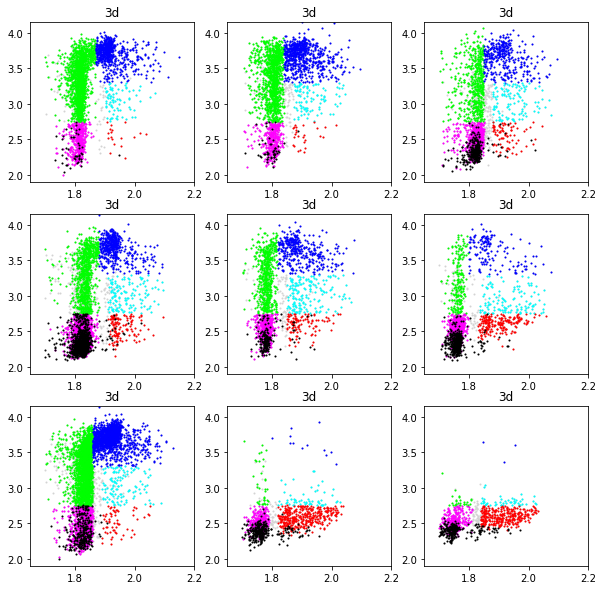

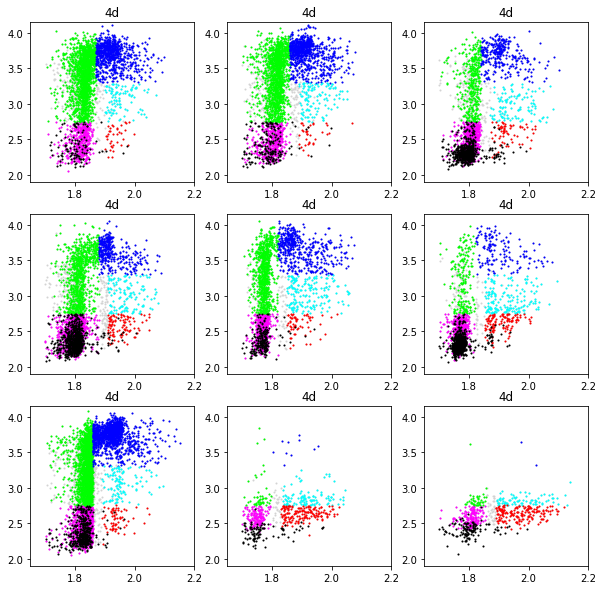

In [64]:
# Scatter plot. x:DNAcontent, y:pRB(log10)

for k, CellLine in enumerate([df4]):
    for i, time in enumerate(['2d', '3d', '4d']):
        f= plt.figure(i+1+3*k, figsize=(10,10))
        for num, SelectedDrug in enumerate(['DMSO', 'BYL0.03', 'F+BYL0.03','Fulv', 'BYL0.3','F+BYL0.3','Tram', 'BYL3','F+BYL3']):
            plt.subplot(3, 3, num+1)
            idx = ((CellLine['Treatment']==SelectedDrug) & (CellLine['Time']==time) )

            #if SelectedDrug == 'DMSO':
            ConDNA = np.percentile (np.log10(  CellLine.loc[idx]['Content']  ), 98)

            CellLine.loc[idx, 'Normalized_DNAcontent'] = np.log10( CellLine.loc[idx]['Content'] )/ConDNA*2
            idx_live = (CellLine['Normalized_DNAcontent']>1.7)
            x_all = CellLine.loc[idx & idx_live]['Normalized_DNAcontent']
            y_all = np.log10(CellLine.loc[idx & idx_live]['pRB_N'])
            
            ## This is to generate index for each population
            idx_Pop1 = ((np.log10(CellLine['Ki67_N'])<=Ki67neg)  & (np.log10(CellLine['pRB_N'])<=RBneg)  )
            idx_Pop2 = ((CellLine['Normalized_DNAcontent']<=DNACutoff[i][num]) &  (np.log10(CellLine['Ki67_N'])>Ki67neg) & (np.log10(CellLine['pRB_N'])<=RBneg) )
            idx_Pop3 = ((CellLine['Normalized_DNAcontent']<=DNACutoff[i][num]) &  (np.log10(CellLine['Ki67_N'])>Ki67neg) & (np.log10(CellLine['pRB_N'])>RBneg)  )
            idx_Pop4 = ((CellLine['Normalized_DNAcontent']>DNACutoff[i][num]) &   (np.log10(CellLine['Ki67_N'])>Ki67neg) & (np.log10(CellLine['pRB_N'])>RBhigh) )
            idx_Pop5 = ((CellLine['Normalized_DNAcontent']>DNACutoff[i][num]+0.03) & (np.log10(CellLine['Ki67_N'])>Ki67neg) & (np.log10(CellLine['pRB_N'])>RBneg) & (np.log10(CellLine['pRB_N'])<=RBhigh) )
            idx_Pop6 = ((CellLine['Normalized_DNAcontent']>DNACutoff[i][num]+0.03) & (np.log10(CellLine['Ki67_N'])>Ki67neg) & (np.log10(CellLine['pRB_N'])<=RBneg) )
            plt.scatter(x_all, y_all, s=1, c='lightgrey')
            for j, chosenPop in enumerate([idx_Pop2, idx_Pop3, idx_Pop4, idx_Pop5, idx_Pop6, idx_Pop1]):
                X_pop = CellLine.loc[idx & idx_live & chosenPop]['Normalized_DNAcontent']
                Y_pop = np.log10(CellLine.loc[idx & idx_live & chosenPop]['pRB_N'])
                plt.scatter(X_pop, Y_pop, s=1, c=color[j])
            plt.xlim(1.65, 2.2)
            plt.ylim(1.9, 4.15)
            plt.title(time)
plt.show()

In [65]:
# Save parameters, BT483, MCF7, T47D, EFM19

Ki67negArray = Ki67negArray + list(Ki67neg)
RBnegArray = RBnegArray + list(RBneg)
RBhighArray = RBhighArray + list(RBhigh)
DNACutoffArray = DNACutoffArray + [list(DNACutoff)]

# Summary

In [66]:
print(Ki67negArray)
print(RBnegArray)
print(RBhighArray)
DNACutoffArray

[2.2, 2.7, 2.2, 2.7]
[2.3, 2.8, 2.25, 2.75]
[2.45, 3.15, 2.5, 3.3]


[[array([ 1.906,  1.88 ,  1.85 ,  1.89 ,  1.87 ,  1.87 ,  1.92 ,  1.83 ,
          1.805]),
  array([ 1.895,  1.897,  1.87 ,  1.85 ,  1.85 ,  1.85 ,  1.91 ,  1.8  ,
          1.79 ]),
  array([ 1.9  ,  1.885,  1.87 ,  1.855,  1.835,  1.83 ,  1.911,  1.81 ,
          1.95 ])],
 [array([ 1.82 ,  1.82 ,  1.83 ,  1.84 ,  1.825,  1.84 ,  1.85 ,  1.82 ,
          1.81 ]),
  array([ 1.84 ,  1.84 ,  1.82 ,  1.835,  1.81 ,  1.83 ,  1.815,  1.815,
          1.83 ]),
  array([ 1.83 ,  1.825,  1.84 ,  1.85 ,  1.82 ,  1.84 ,  1.84 ,  1.825,
          1.86 ])],
 [array([ 1.89,  1.91,  1.91,  1.93,  1.9 ,  1.93,  1.9 ,  1.83,  1.86]),
  array([ 1.92,  1.91,  1.91,  1.94,  1.89,  1.89,  1.93,  1.83,  1.86]),
  array([ 1.93,  1.92,  1.89,  1.91,  1.88,  1.88,  1.9 ,  1.83,  1.86])],
 [array([ 1.87,  1.86,  1.86,  1.88,  1.85,  1.84,  1.86,  1.81,  1.79]),
  array([ 1.87,  1.84,  1.85,  1.88,  1.82,  1.8 ,  1.86,  1.79,  1.81]),
  array([ 1.87,  1.86,  1.84,  1.88,  1.82,  1.82,  1.86,  1.8 ,  1.86])]]

# Final, to make dataframe of summary (df_Sum)

In [67]:
# Create lists with the different factors.

CellNameList = ['BT483', 'MCF7', 'T47D', 'EFM19']
Treatment = ['DMSO', 'BYL0.03', 'F+BYL0.03','Fulv', 'BYL0.3','F+BYL0.3','Tram', 'BYL3','F+BYL3']
Time = ['2d','3d','4d']
Population = ['Pop2', 'Pop3', 'Pop4', 'Pop5', 'Pop6', 'Pop1']
              
# Generate a dataframe with all combinations of all factors (Cartesian product).
df_Sum = pd.DataFrame(list(itertools.product(
    CellNameList, Treatment, Time, Population
)))
df_Sum.columns = ['CellLine', 'Treatment' , 'Time', 'Population']

C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


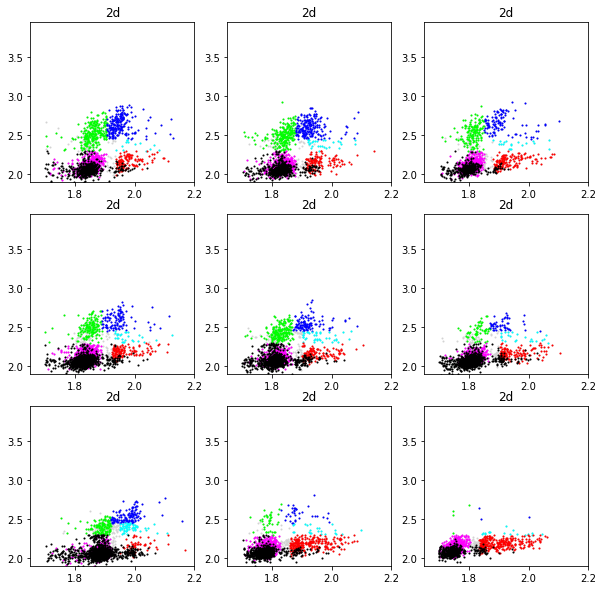

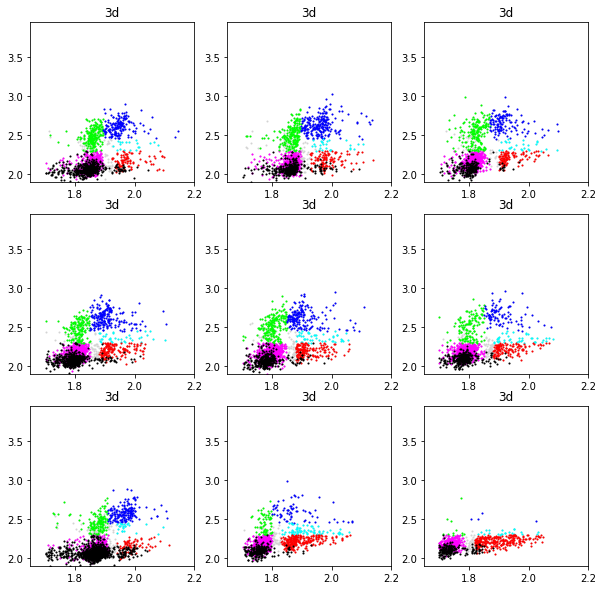

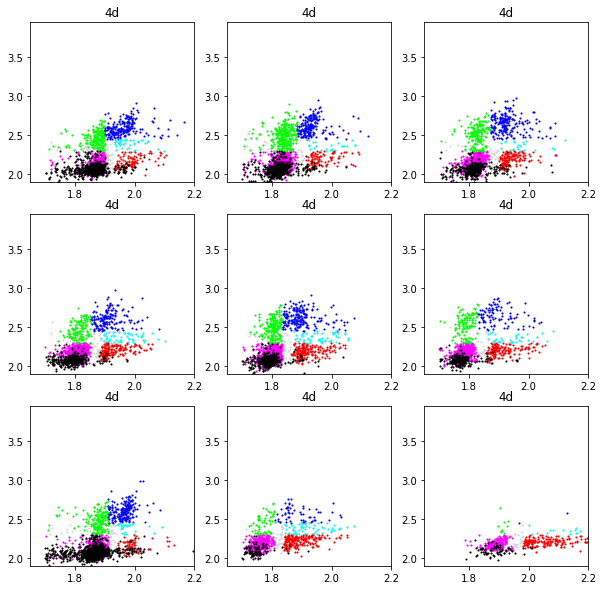

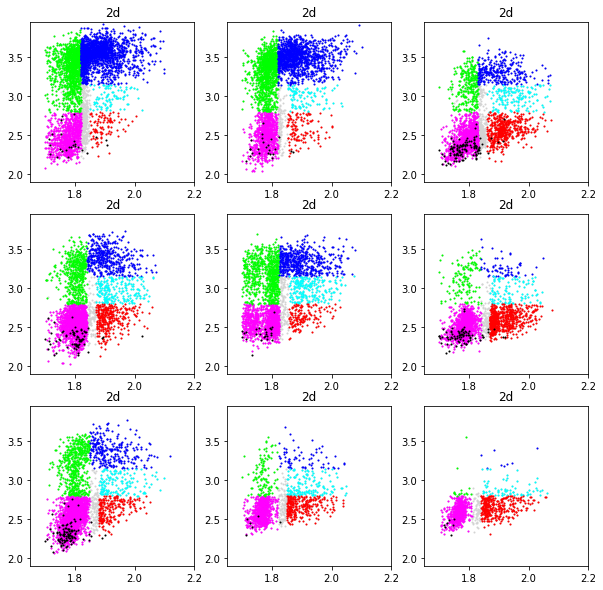

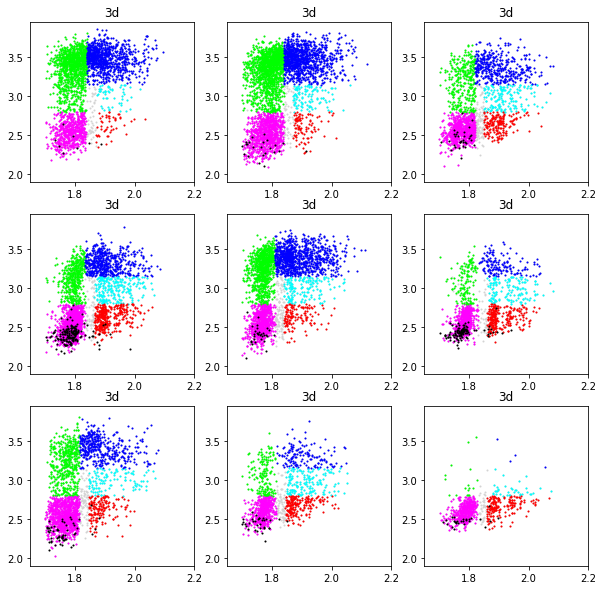

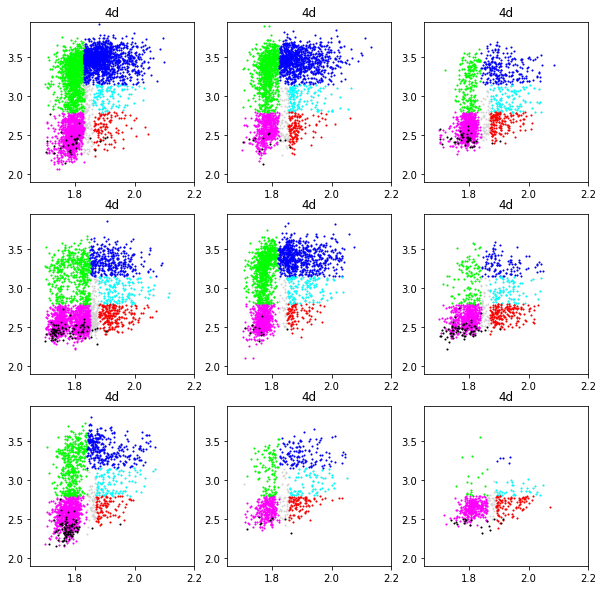

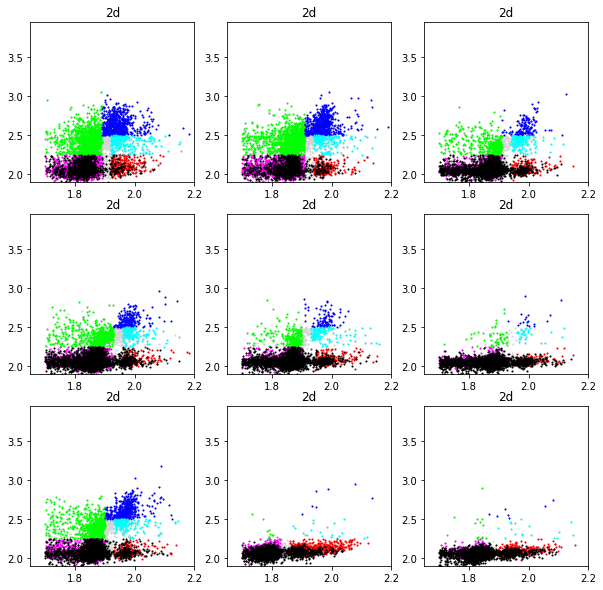

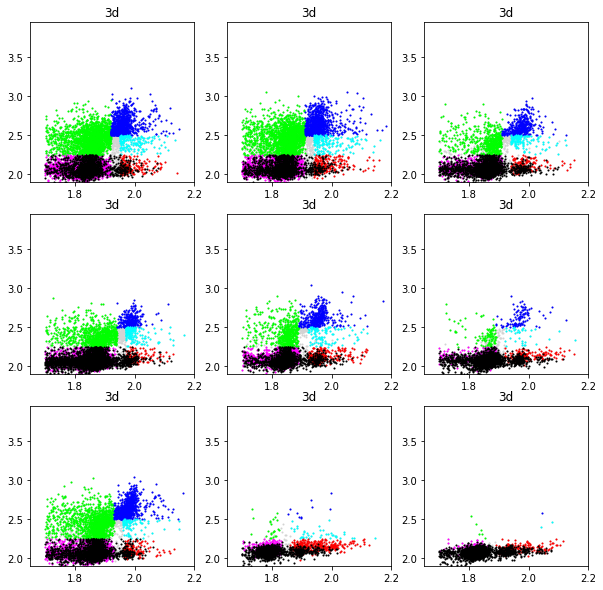

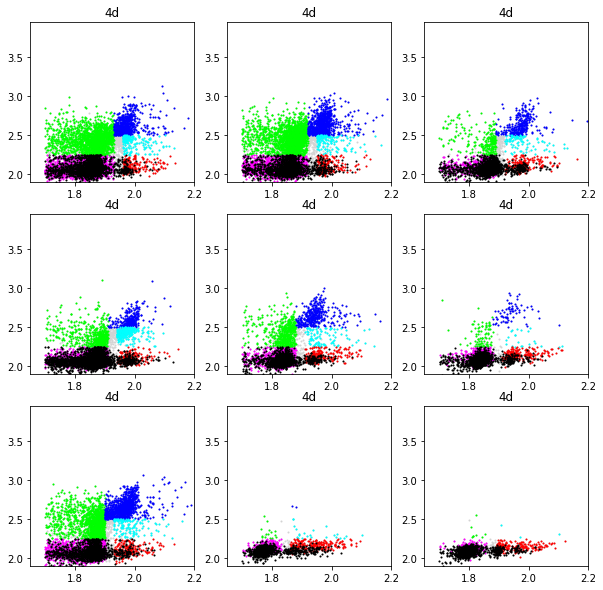

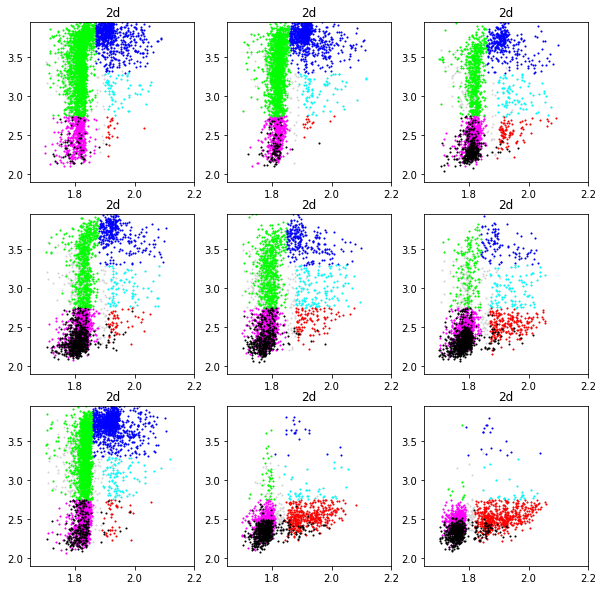

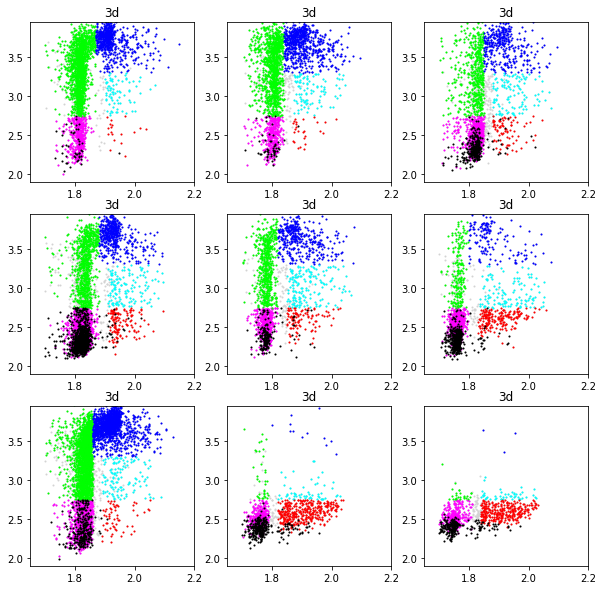

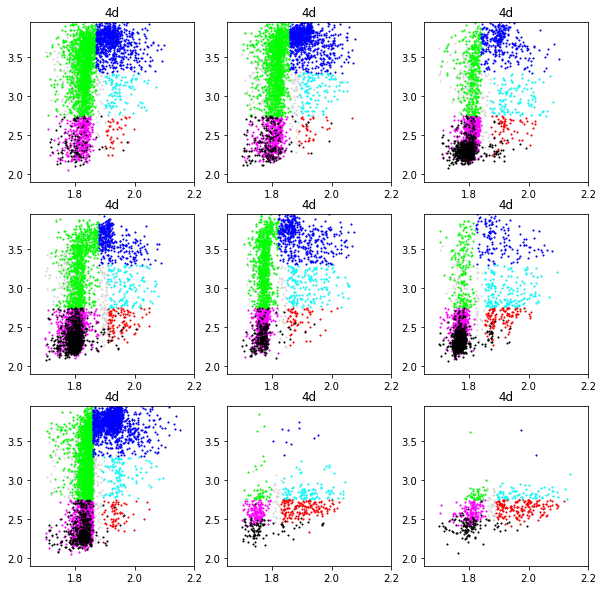

In [72]:
for k, CellLine in enumerate([df1, df2, df3, df4]):

    for i, time in enumerate(['2d', '3d', '4d']):
        plt.figure(i+1+3*k, figsize=(10,10))

        for num, SelectedDrug in enumerate(['DMSO', 'BYL0.03', 'F+BYL0.03','Fulv', 'BYL0.3','F+BYL0.3','Tram', 'BYL3','F+BYL3']):
            plt.subplot(3, 3, num+1)
            idx = ((CellLine['Treatment']==SelectedDrug) & (CellLine['Time']==time) )

            if k==0:
                ConDNA = np.percentile (np.log10(  CellLine.loc[idx]['Content']/CellLine.loc[idx]['DAPI1_N']*CellLine.loc[idx]['DAPI2_N']  ), 98)
                CellLine.loc[idx, 'Normalized_DNAcontent'] = np.log10( CellLine.loc[idx]['Content']/CellLine.loc[idx]['DAPI1_N']*CellLine.loc[idx]['DAPI2_N'] )/ConDNA*2
 
            else:
                ConDNA = np.percentile (np.log10(CellLine.loc[idx]['Content']), 98)
                CellLine.loc[idx, 'Normalized_DNAcontent'] = np.log10(CellLine.loc[idx]['Content'])/ConDNA*2
 
            idx_live = (CellLine['Normalized_DNAcontent']>1.7)
             
            x_all = CellLine.loc[idx & idx_live]['Normalized_DNAcontent']
            y_all = np.log10(CellLine.loc[idx & idx_live]['pRB_N'])
            
            idx_Pop1 = ((np.log10(CellLine['Ki67_N'])<=Ki67negArray[k]) 
                        & (np.log10(CellLine['pRB_N'])<=RBnegArray[k]) )
            
            idx_Pop2 = ((CellLine['Normalized_DNAcontent']<=DNACutoffArray[k][i][num]) &
                        (np.log10(CellLine['Ki67_N'])>Ki67negArray[k]) &
                        (np.log10(CellLine['pRB_N'])<=RBnegArray[k]) )
            
            idx_Pop3 = ((CellLine['Normalized_DNAcontent']<=DNACutoffArray[k][i][num]) &
                        (np.log10(CellLine['Ki67_N'])>Ki67negArray[k]) &
                        (np.log10(CellLine['pRB_N'])>RBnegArray[k]) )
            
            idx_Pop4 = ((CellLine['Normalized_DNAcontent']>DNACutoffArray[k][i][num]) &
                        (np.log10(CellLine['Ki67_N'])>Ki67negArray[k]) &
                        (np.log10(CellLine['pRB_N'])>RBhighArray[k]) )
            
            idx_Pop5 = ((CellLine['Normalized_DNAcontent']>DNACutoffArray[k][i][num]+0.03) &
                        (np.log10(CellLine['Ki67_N'])>Ki67negArray[k]) &
                        (np.log10(CellLine['pRB_N'])>RBnegArray[k]) &
                        (np.log10(CellLine['pRB_N'])<=RBhighArray[k]) )
            
            idx_Pop6 = ((CellLine['Normalized_DNAcontent']>DNACutoffArray[k][i][num]+0.03) &
                        (np.log10(CellLine['Ki67_N'])>Ki67negArray[k]) &
                        (np.log10(CellLine['pRB_N'])<=RBnegArray[k]))
            
            plt.scatter(x_all, y_all, s=1, c='lightgrey')
            
            for j, chosenPop in enumerate([idx_Pop2, idx_Pop3, idx_Pop4, idx_Pop5, idx_Pop6, idx_Pop1]):
                X_pop = CellLine.loc[idx & idx_live & chosenPop]['Normalized_DNAcontent']
                Y_pop = np.log10(CellLine.loc[idx & idx_live & chosenPop]['pRB_N'])
                
                plt.scatter(X_pop, Y_pop, s=1, c=color[j])

                plt.xlim(1.65, 2.2)
                plt.ylim(1.9, 3.95)
                plt.title(time)

                for a, Readout in enumerate(['pRB_N', 'pRB_C', 'Ki67_N', 'Ki67_C', 'pS6-235_N', 'pS6-235_C', 'pSmad1/5_N', 'pSmad1/5_C']):
                    location = ((df_Sum['CellLine']==CellNameList[k]) & (df_Sum['Treatment']==SelectedDrug) 
                                & (df_Sum['Time']==time) & (df_Sum['Population']==Population[j]))
                    df_Sum.loc[location, Readout] = np.median(np.log10(CellLine.loc[idx & idx_live & chosenPop][Readout]))
                                    
plt.show()


#     % Column 11-20: DAPI Cycle1
#     % Column 21-30: Cy3 Cycle0 
#     % Column 31-40: Cy3 Cycle1 :pRB
#     % Column 41-50: Cy5 Cycle0 :pSmad1/5 or pSmad2/3
#     % Column 51-60: Cy5 Cycle1 :pS6-235
#     % Column 61-70: FITC Cycle0 
#     % Column 71-80: FITC Cycle1 :Ki67

In [73]:
df_Sum.columns

Index(['CellLine', 'Treatment', 'Time', 'Population', 'pRB_N', 'pRB_C',
       'Ki67_N', 'Ki67_C', 'pS6-235_N', 'pS6-235_C', 'pSmad1/5_N',
       'pSmad1/5_C'],
      dtype='object')

# Save file

In [74]:
# Save the final dataframe

df_Sum.to_csv('.\Set4_summary\SixPop_set4_BCD_pSmad15_etc.csv')

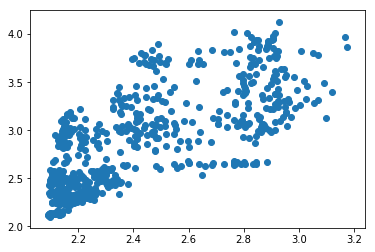

In [75]:
plt.scatter(df_Sum['pSmad1/5_N'],df_Sum['Ki67_N'])
plt.show()
            